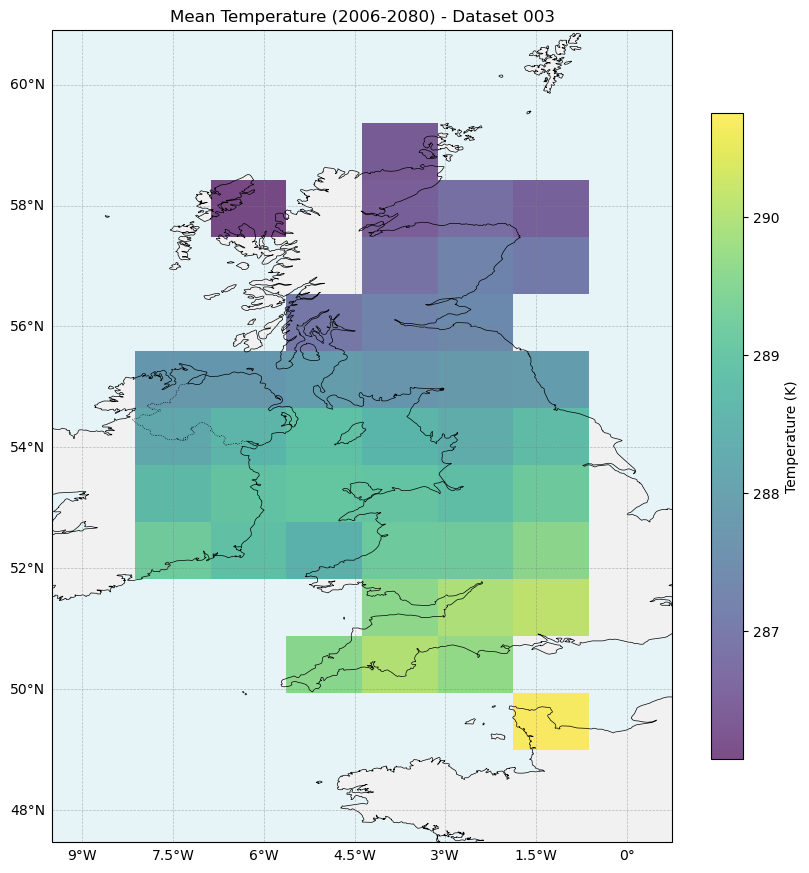

C:\Users\rebec\AppData\Local\Temp\ipykernel_49612\595570414.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


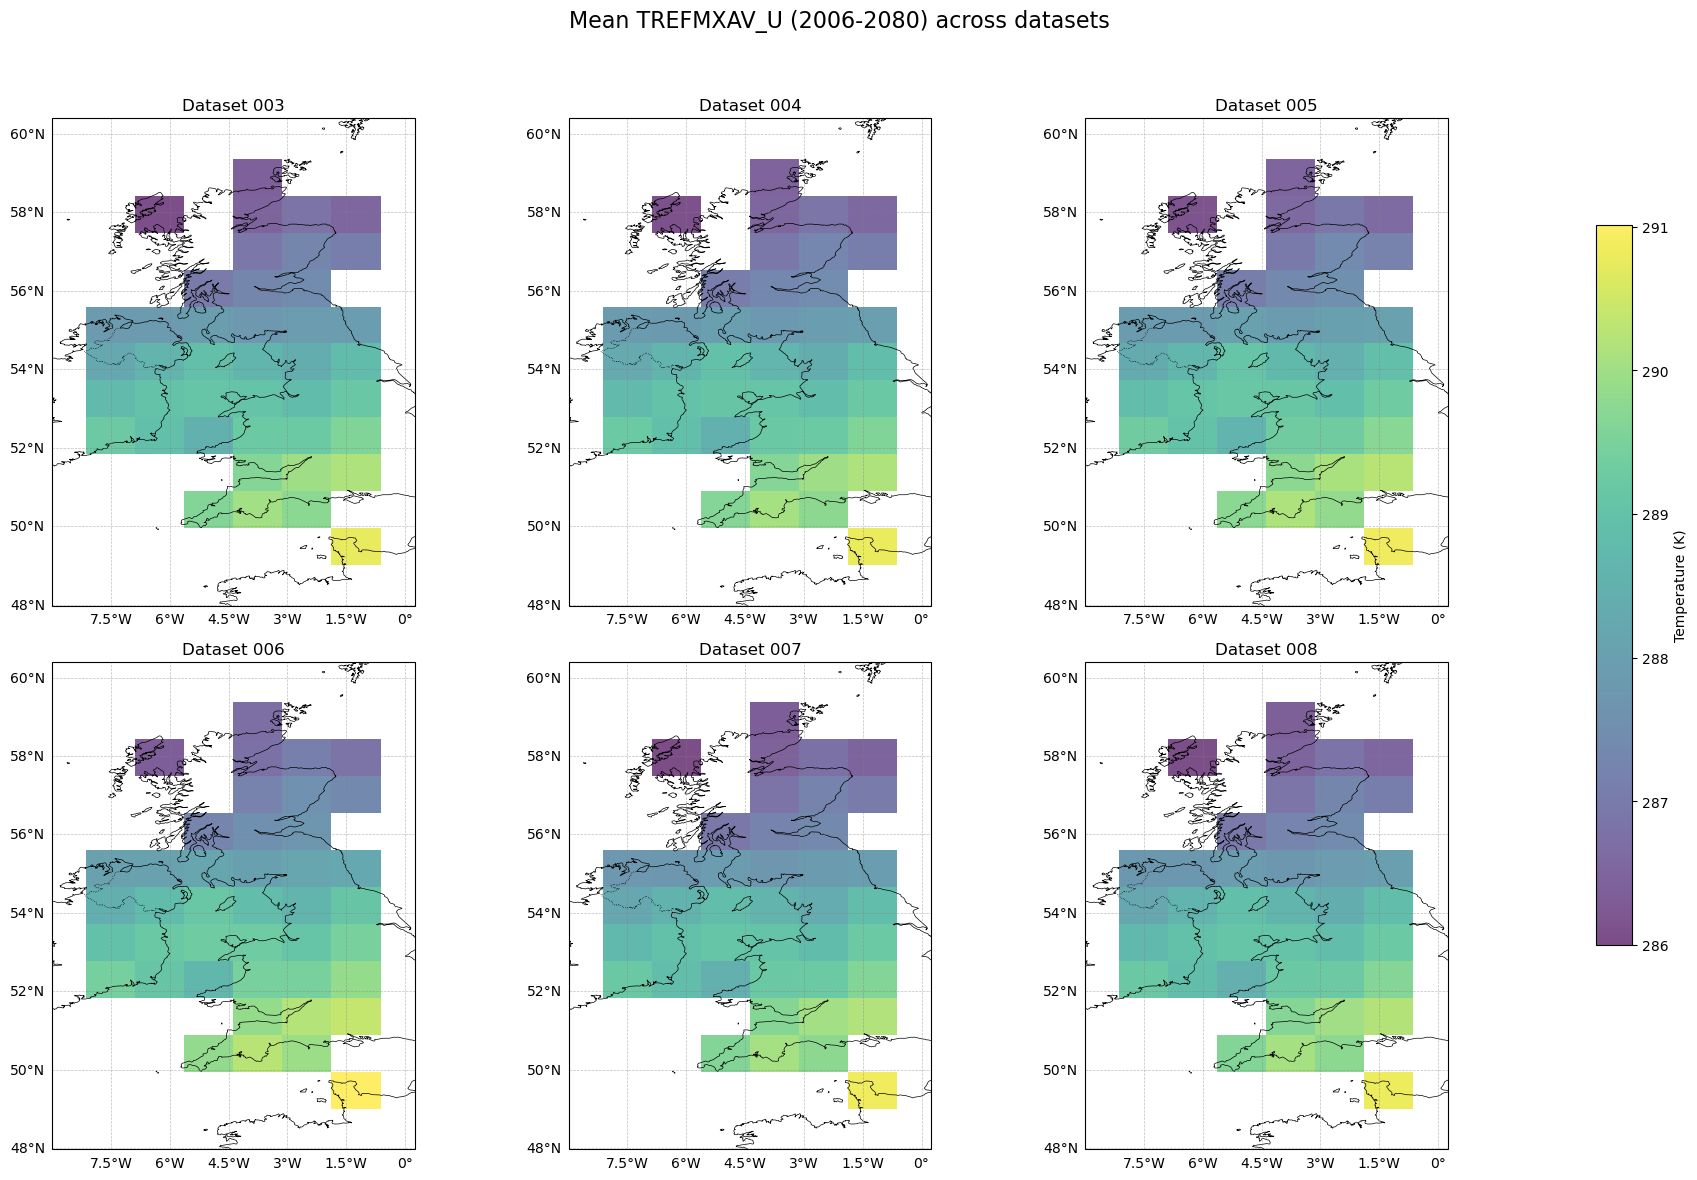

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import sys

# Import helper function
sys.path.append('.')
from helper import load_datasets

# Define file paths and load datasets
file_paths = [f"../data/00{i}_2006_2080_352_360.nc" for i in range(3, 9)]
datasets = load_datasets(file_paths)

# Plot single dataset on UK map
# Calculate temporal mean of temperature
temp_mean = datasets[0].TREFMXAV_U.mean(dim='time')
lon_values = np.where(temp_mean.lon.values > 180, temp_mean.lon.values - 360, temp_mean.lon.values)

# Create figure and axes with PlateCarree projection
plt.figure(figsize=(10, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add detailed features focusing on UK
ax.add_feature(cf.COASTLINE, linewidth=0.5)
ax.add_feature(cf.BORDERS, linestyle=':', linewidth=0.5)
ax.add_feature(cf.LAND, facecolor='lightgray', alpha=0.3)
ax.add_feature(cf.OCEAN, facecolor='lightblue', alpha=0.3)

# Set map extent to fit data with padding
lon_min, lon_max = min(lon_values), max(lon_values)
lat_min, lat_max = min(temp_mean.lat.values), max(temp_mean.lat.values)
padding = 2
ax.set_extent([lon_min-padding, lon_max+padding, 
              lat_min-padding, lat_max+padding], 
              crs=ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Plot temperature data
mesh = ax.pcolormesh(lon_values, temp_mean.lat.values, temp_mean, 
                    transform=ccrs.PlateCarree(), 
                    cmap='viridis', alpha=0.7)

# Add colorbar
cbar = plt.colorbar(mesh, shrink=0.7)
cbar.set_label('Temperature (K)')

plt.title('Mean Temperature (2006-2080) - Dataset 003')
plt.show()

# Plot comparison of all datasets
fig = plt.figure(figsize=(18, 12))

# Calculate min/max for consistent coloring
all_means = [ds.TREFMXAV_U.mean(dim='time') for ds in datasets]
vmin = min(mean.min() for mean in all_means)
vmax = max(mean.max() for mean in all_means)

for i, ds in enumerate(datasets):
    # Calculate mean temperature
    temp_mean = ds.TREFMXAV_U.mean(dim='time')
    lon_values = np.where(temp_mean.lon.values > 180, temp_mean.lon.values - 360, temp_mean.lon.values)
    
    # Create subplot
    ax = fig.add_subplot(2, 3, i+1, projection=ccrs.PlateCarree())
    
    # Add map features
    ax.add_feature(cf.COASTLINE, linewidth=0.5)
    ax.add_feature(cf.BORDERS, linestyle=':', linewidth=0.5)
    
    # Set extent
    lon_min, lon_max = min(lon_values), max(lon_values)
    lat_min, lat_max = min(temp_mean.lat.values), max(temp_mean.lat.values)
    padding = 1.5
    ax.set_extent([lon_min-padding, lon_max+padding, 
                  lat_min-padding, lat_max+padding], 
                  crs=ccrs.PlateCarree())
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    
    # Plot data
    mesh = ax.pcolormesh(lon_values, temp_mean.lat.values, temp_mean, 
                       transform=ccrs.PlateCarree(), 
                       cmap='viridis', alpha=0.7,
                       vmin=vmin, vmax=vmax)
    
    ax.set_title(f'Dataset {i+3:03d}')

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(mesh, cax=cbar_ax)
cbar.set_label('Temperature (K)')

plt.suptitle('Mean TREFMXAV_U (2006-2080) across datasets', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

C:\Users\rebec\AppData\Local\Temp\ipykernel_49612\2257081538.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


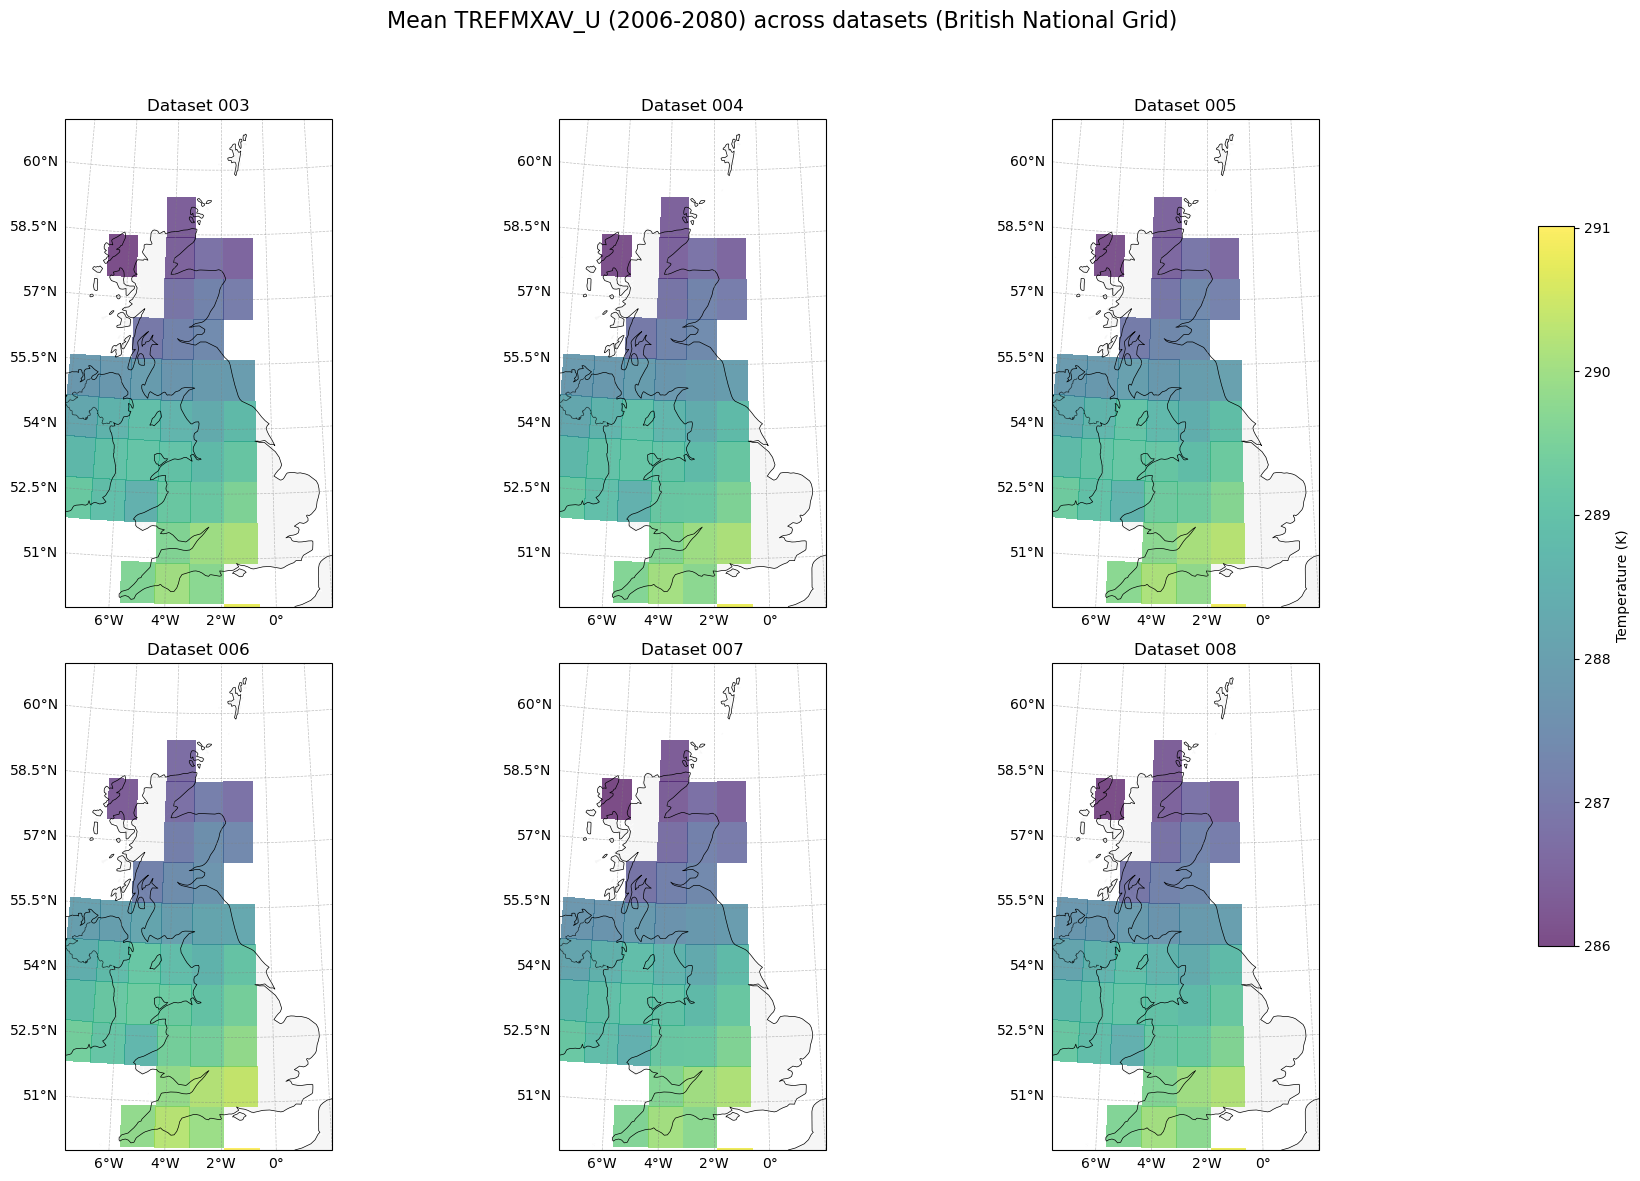

In [8]:
# Import helper function
sys.path.append('.')
from helper import load_datasets

# Define file paths and load datasets
file_paths = [f"../data/00{i}_2006_2080_352_360.nc" for i in range(3, 9)]
datasets = load_datasets(file_paths)

# Plot comparison of all datasets
fig = plt.figure(figsize=(18, 12))

# Define projections
data_crs = ccrs.PlateCarree()  # Your data is in lat/lon coordinates
plot_crs = ccrs.OSGB()  # British National Grid

# Calculate min/max for consistent coloring
all_means = [ds.TREFMXAV_U.mean(dim='time') for ds in datasets]
vmin = min(mean.min() for mean in all_means)
vmax = max(mean.max() for mean in all_means)

for i, ds in enumerate(datasets):
    # Calculate mean temperature
    temp_mean = ds.TREFMXAV_U.mean(dim='time')
    lon_values = np.where(temp_mean.lon.values > 180, temp_mean.lon.values - 360, temp_mean.lon.values)
    
    # Create subplot
    ax = fig.add_subplot(2, 3, i+1, projection=plot_crs)
    
    # Add map features
    ax.coastlines(resolution='50m', linewidth=0.5)
    ax.add_feature(cf.BORDERS, linewidth=0.5, alpha=0.7)
    ax.add_feature(cf.LAND, facecolor='lightgray', alpha=0.2)
    
    # Set extent to cover UK
    ax.set_extent([-9, 2, 49, 61], crs=data_crs)
    
    # Add gridlines (note: these will be in OSGB coordinates)
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    
    # Plot data
    mesh = ax.pcolormesh(lon_values, temp_mean.lat.values, temp_mean, 
                       transform=data_crs,  # Important: specify the CRS of your data
                       cmap='viridis', alpha=0.7,
                       vmin=vmin, vmax=vmax)
    
    ax.set_title(f'Dataset {i+3:03d}')

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(mesh, cax=cbar_ax)
cbar.set_label('Temperature (K)')

plt.suptitle('Mean TREFMXAV_U (2006-2080) across datasets (British National Grid)', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

C:\Users\rebec\AppData\Local\Temp\ipykernel_49612\1897217288.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


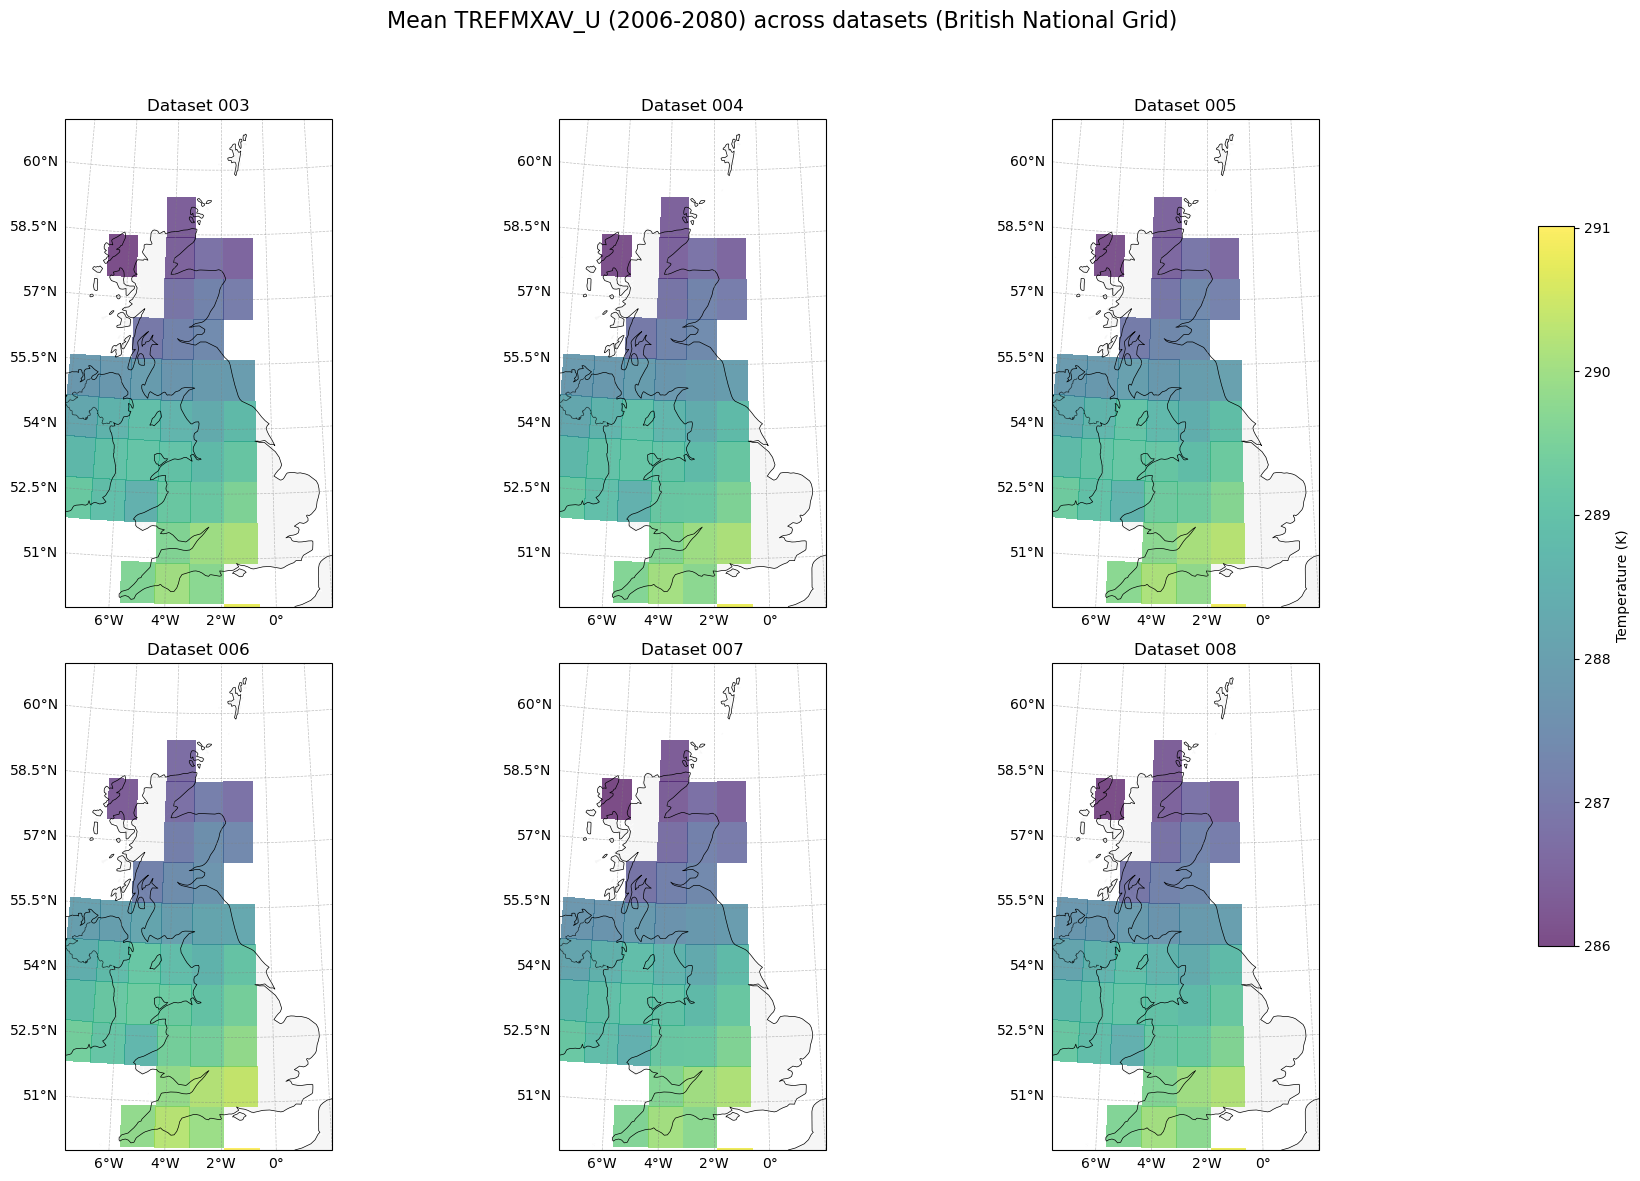

In [9]:
# Import helper function
sys.path.append('.')
from helper import load_datasets

# Define file paths and load datasets
file_paths = [f"../data/00{i}_2006_2080_352_360.nc" for i in range(3, 9)]
datasets = load_datasets(file_paths)

# Plot comparison of all datasets
fig = plt.figure(figsize=(18, 12))

# Define projections
data_crs = ccrs.PlateCarree()  # The data is in lat/lon coordinates
plot_crs = ccrs.OSGB()  # Plot to British National Grid

# Calculate min/max for consistent coloring
all_means = [ds.TREFMXAV_U.mean(dim='time') for ds in datasets]
vmin = min(mean.min() for mean in all_means)
vmax = max(mean.max() for mean in all_means)

for i, ds in enumerate(datasets):
    # Calculate mean temperature
    temp_mean = ds.TREFMXAV_U.mean(dim='time')
    lon_values = np.where(temp_mean.lon.values > 180, temp_mean.lon.values - 360, temp_mean.lon.values)

    # Create subplot
    ax = fig.add_subplot(2, 3, i + 1, projection=plot_crs)

    # Add map features
    ax.coastlines(resolution='50m', linewidth=0.5)
    ax.add_feature(cf.BORDERS, linewidth=0.5, alpha=0.7)
    ax.add_feature(cf.LAND, facecolor='lightgray', alpha=0.2)

    # Set extent to cover the UK
    ax.set_extent([-9, 2, 49, 61], crs=data_crs)

    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    # Plot data with transformation
    mesh = ax.pcolormesh(lon_values, temp_mean.lat.values, temp_mean, 
                         transform=data_crs,  # Important: specify the CRS of your data
                         cmap='viridis', alpha=0.7,
                         vmin=vmin, vmax=vmax)

    ax.set_title(f'Dataset {i + 3:03d}')

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(mesh, cax=cbar_ax)
cbar.set_label('Temperature (K)')

plt.suptitle('Mean TREFMXAV_U (2006-2080) across datasets (British National Grid)', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


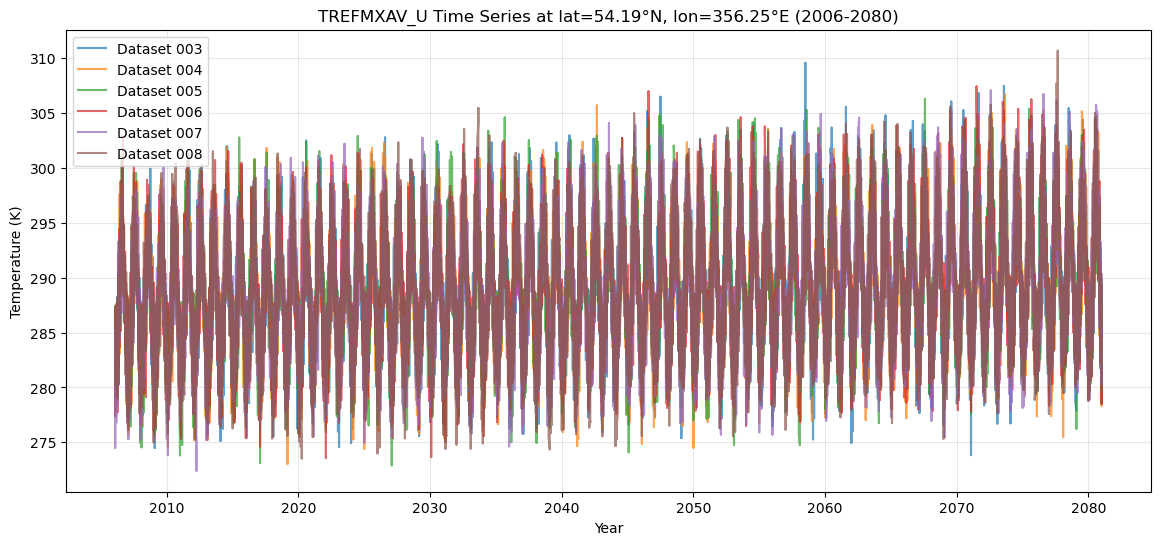

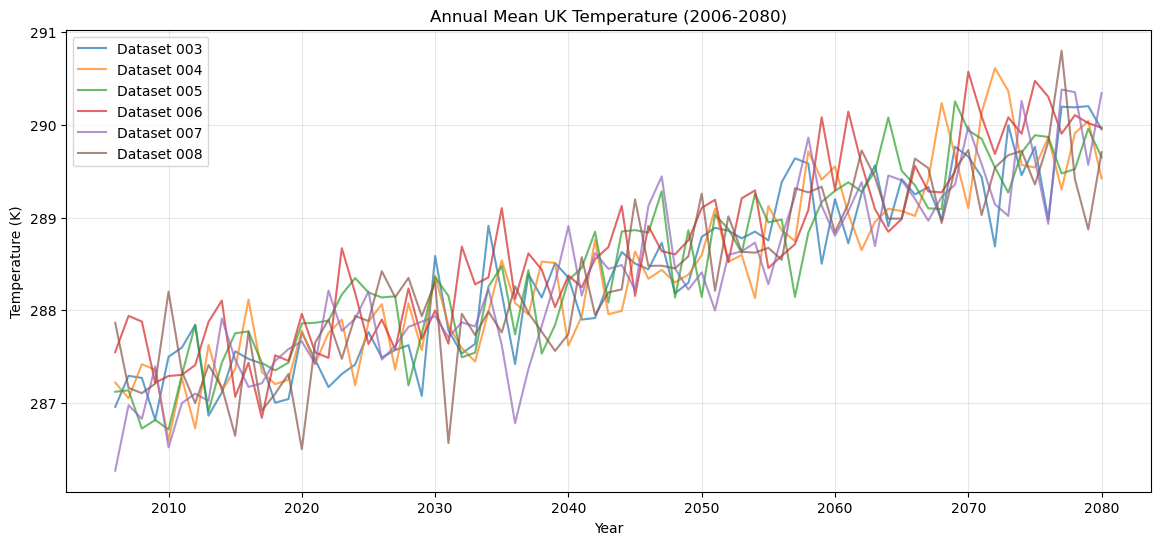

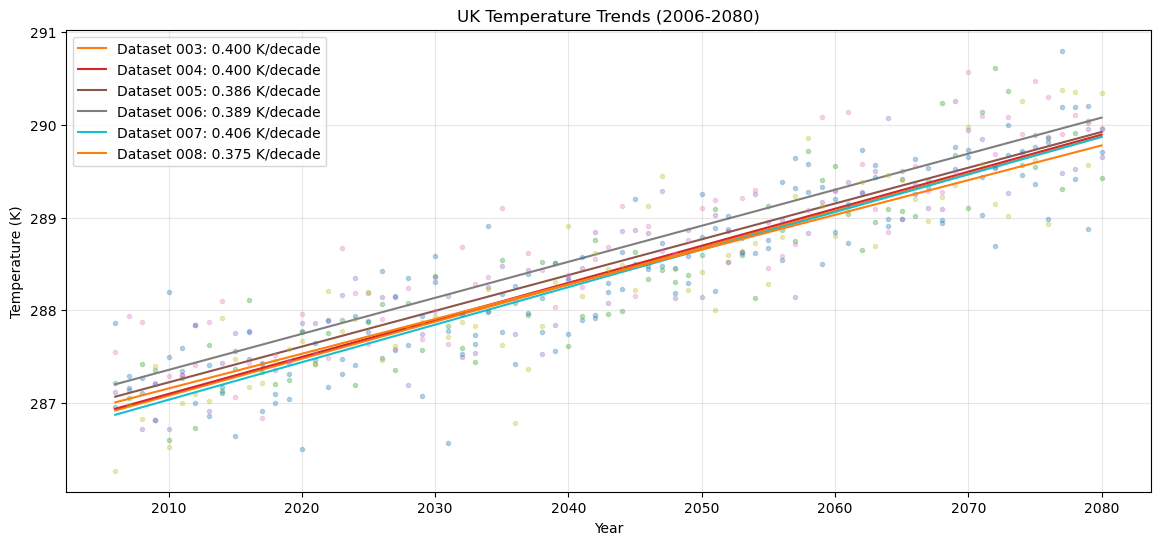

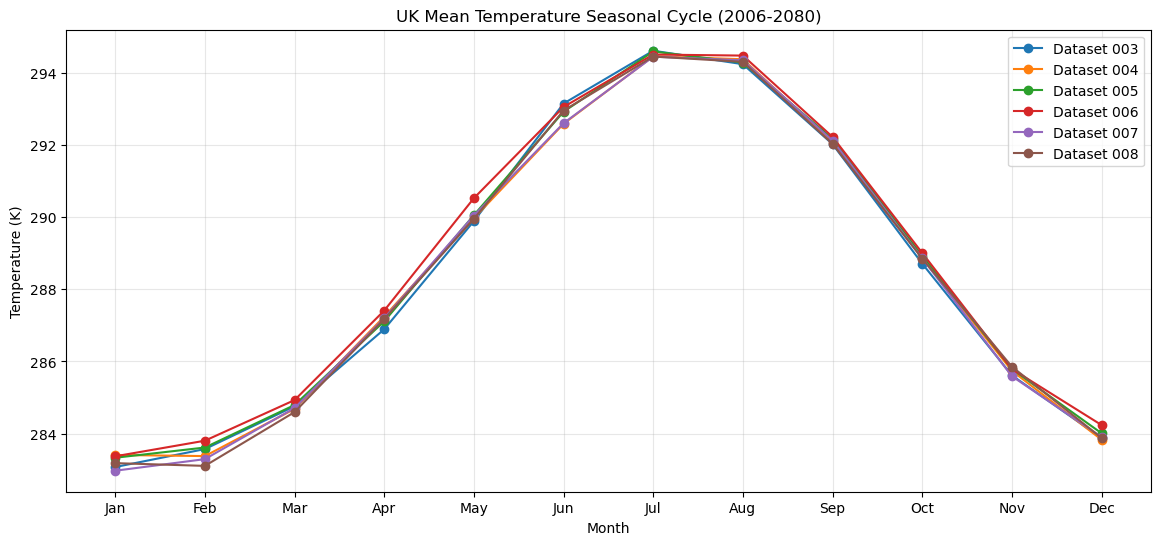

In [10]:
# Import helper function
sys.path.append('.')
from helper import load_datasets

# Define file paths and load datasets
file_paths = [f"../data/00{i}_2006_2080_352_360.nc" for i in range(3, 9)]
datasets = load_datasets(file_paths)

# 1. Basic time series for a specific location
# Choose a specific grid cell (e.g., London area or central UK)
lat_idx = 5  # Adjust these indices based on your data
lon_idx = 3

plt.figure(figsize=(14, 6))

# Plot time series for each dataset
for i, ds in enumerate(datasets):
    # Extract time series at the specified location
    temp_series = ds.TREFMXAV_U.isel(lat=lat_idx, lon=lon_idx)
    
    # Convert time to decimal years for better visualization
    years = [float(str(t.values)[:4]) + float(str(t.values)[5:7])/12 for t in temp_series.time]
    
    # Plot the time series
    plt.plot(years, temp_series.values, label=f'Dataset {i+3:03d}', alpha=0.7)

# Add labels and title
chosen_lat = datasets[0].lat.values[lat_idx]
chosen_lon = datasets[0].lon.values[lon_idx]
plt.title(f'TREFMXAV_U Time Series at lat={chosen_lat:.2f}°N, lon={chosen_lon:.2f}°E (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 2. Calculate UK average temperature over time
plt.figure(figsize=(14, 6))

for i, ds in enumerate(datasets):
    # Calculate spatial mean across all valid grid cells for each time step
    uk_mean = ds.TREFMXAV_U.mean(dim=['lat', 'lon'])
    
    # Group by year and calculate annual means
    annual_uk_means = uk_mean.groupby('time.year').mean()
    
    # Plot UK average annual temperature
    plt.plot(annual_uk_means.year, annual_uk_means, label=f'Dataset {i+3:03d}', alpha=0.7)

plt.title('Annual Mean UK Temperature (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 3. Calculate temperature trend (linear regression) for each dataset
plt.figure(figsize=(14, 6))

# Prepare for storing trend values
trends = []

for i, ds in enumerate(datasets):
    # Calculate UK mean temperature for each time step
    uk_mean = ds.TREFMXAV_U.mean(dim=['lat', 'lon'])
    
    # Group by year
    annual_uk_means = uk_mean.groupby('time.year').mean()
    
    # Convert to numpy arrays for regression
    x = annual_uk_means.year.values
    y = annual_uk_means.values
    
    # Calculate linear trend
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    
    # Store trend (degrees per decade)
    trend_per_decade = z[0] * 10
    trends.append(trend_per_decade)
    
    # Plot data and trend line
    plt.plot(x, y, 'o', alpha=0.3, markersize=3)
    plt.plot(x, p(x), '-', label=f'Dataset {i+3:03d}: {trend_per_decade:.3f} K/decade')

plt.title('UK Temperature Trends (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 4. Create a seasonal cycle plot
plt.figure(figsize=(14, 6))

for i, ds in enumerate(datasets):
    # Calculate UK mean
    uk_mean = ds.TREFMXAV_U.mean(dim=['lat', 'lon'])
    
    # Group by month and calculate climatology
    monthly_clim = uk_mean.groupby('time.month').mean()
    
    # Plot seasonal cycle
    plt.plot(monthly_clim.month, monthly_clim, 'o-', label=f'Dataset {i+3:03d}')

plt.title('UK Mean Temperature Seasonal Cycle (2006-2080)')
plt.xlabel('Month')
plt.ylabel('Temperature (K)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\rebec\AppData\Local\Temp\ipykernel_49612\3166082136.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


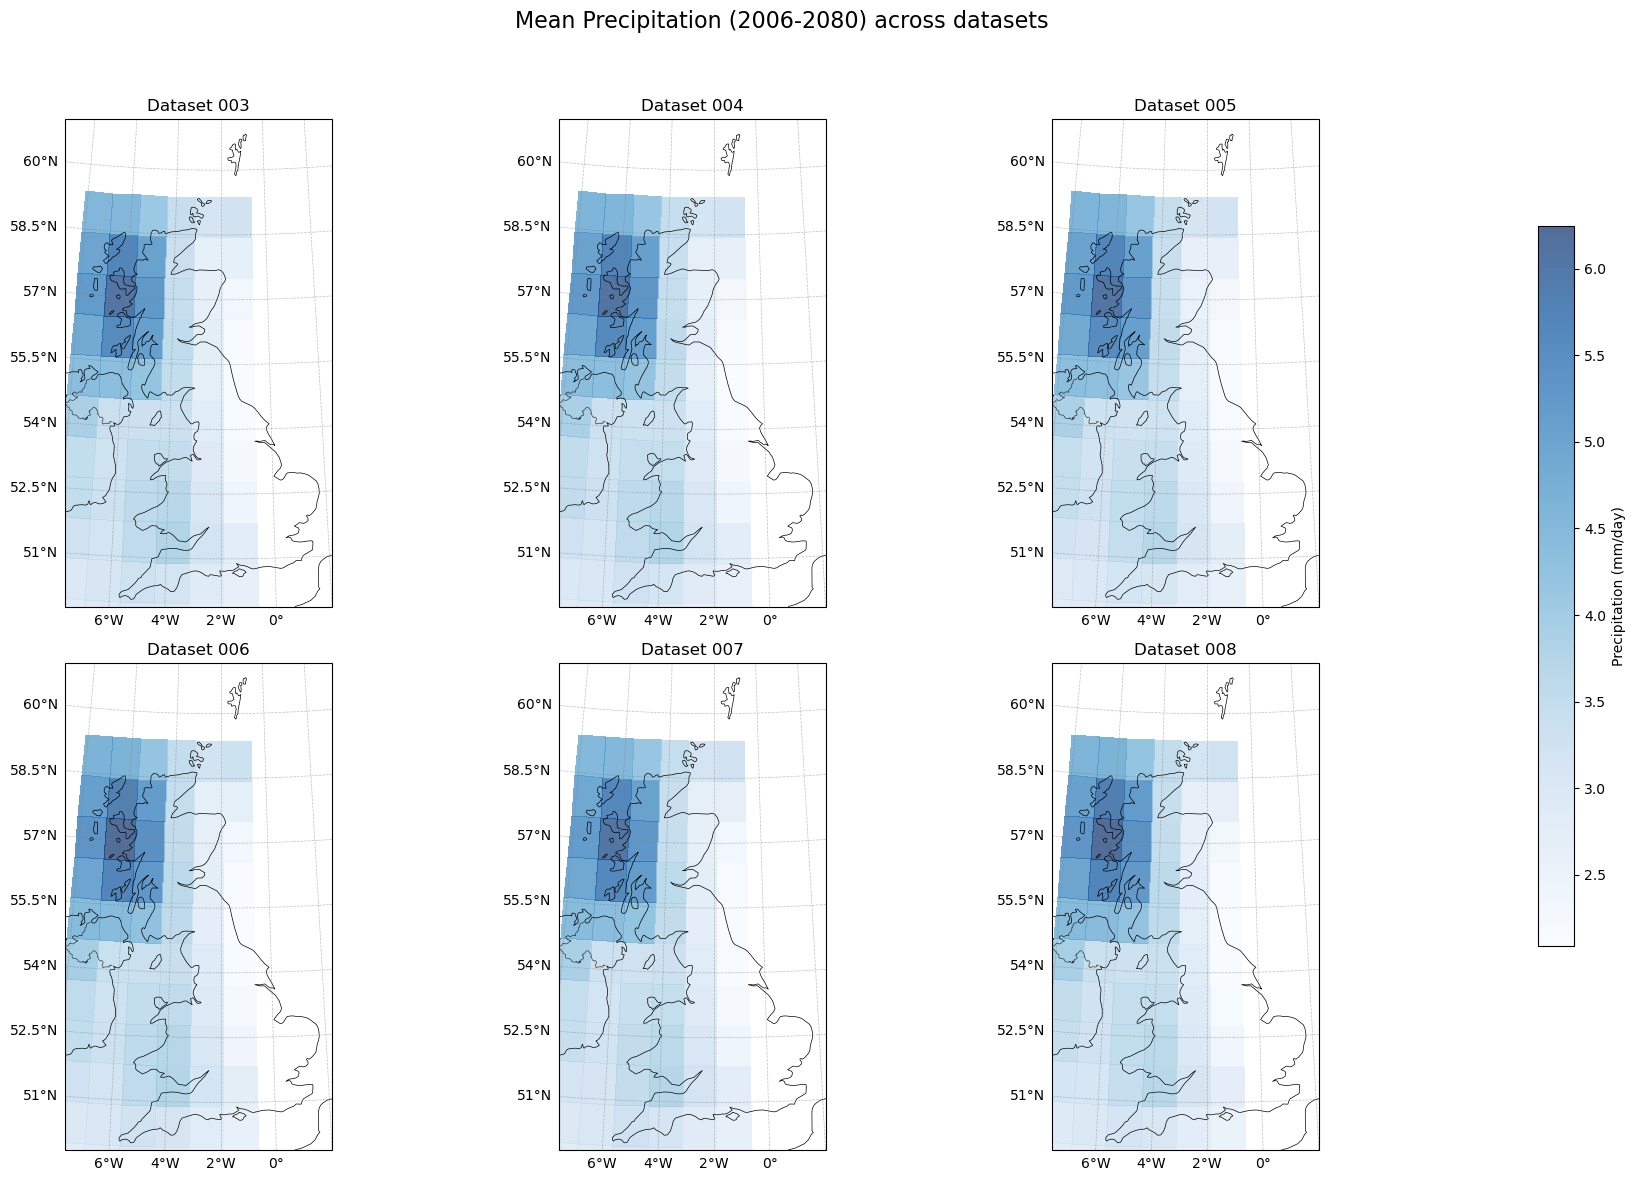

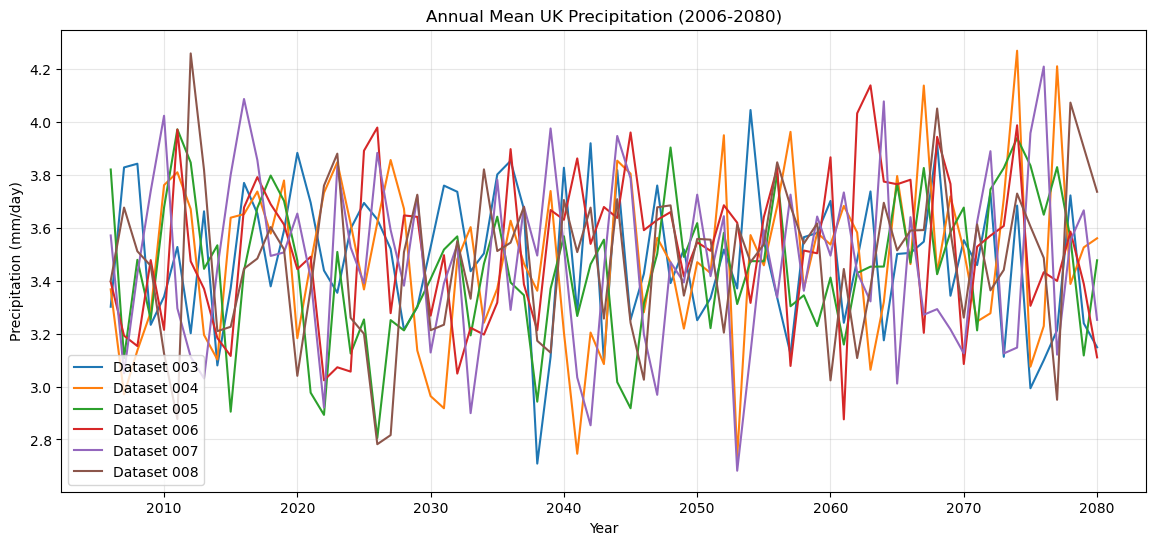

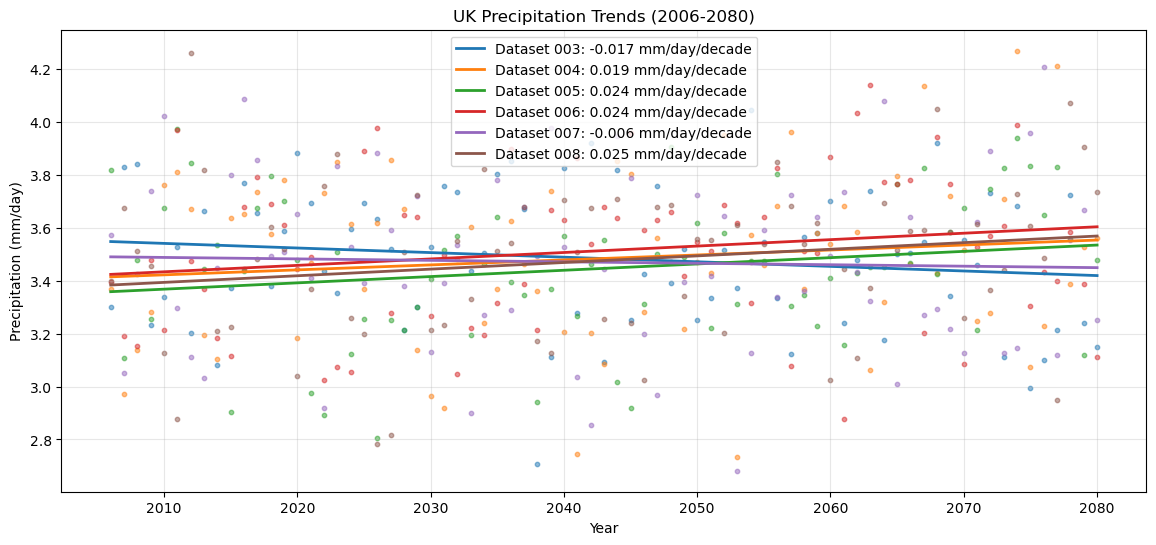

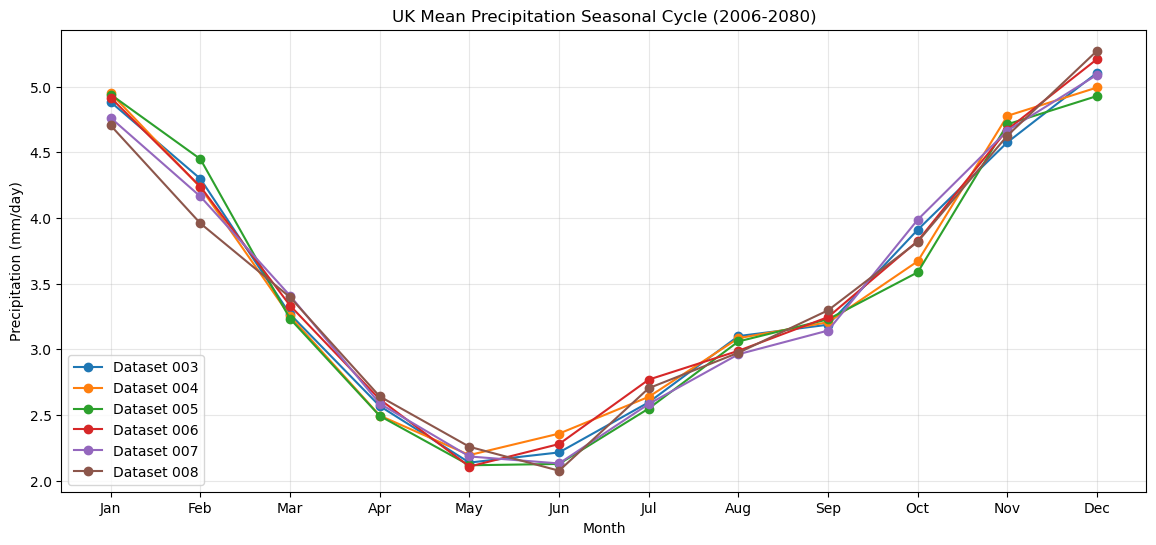

In [13]:
# Import helper function
sys.path.append('.')
from helper import load_datasets

# Define file paths and load datasets
file_paths = [f"../data/00{i}_2006_2080_352_360.nc" for i in range(3, 9)]
datasets = load_datasets(file_paths)

# Convert longitude from 0-360 to -180 to 180 format
def convert_longitude(lon):
    return np.where(lon > 180, lon - 360, lon)

# Note: PRECT is typically in m/s in CESM, so convert to mm/day for easier interpretation
conversion_factor = 86400 * 1000  # seconds in a day * 1000 to convert m to mm

# 1. Create spatial maps of precipitation across the UK
fig = plt.figure(figsize=(18, 12))

# Calculate min/max for consistent coloring
all_means = [ds.PRECT.mean(dim='time') * conversion_factor for ds in datasets]
vmin = min(mean.min() for mean in all_means)
vmax = max(mean.max() for mean in all_means)

for i, ds in enumerate(datasets):
    # Calculate mean precipitation
    precip_mean = ds.PRECT.mean(dim='time') * conversion_factor
    lon_values = convert_longitude(precip_mean.lon.values)
    
    # Create subplot with British National Grid projection
    ax = fig.add_subplot(2, 3, i+1, projection=ccrs.OSGB())
    
    # Add map features
    ax.coastlines(resolution='50m', linewidth=0.5)
    ax.add_feature(cf.BORDERS, linewidth=0.5, alpha=0.7)
    
    # Set extent to UK
    ax.set_extent([-9, 2, 49, 61], crs=ccrs.PlateCarree())
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    
    # Plot precipitation data
    mesh = ax.pcolormesh(lon_values, precip_mean.lat.values, precip_mean, 
                       transform=ccrs.PlateCarree(),
                       cmap='Blues', alpha=0.7,
                       vmin=vmin, vmax=vmax)
    
    ax.set_title(f'Dataset {i+3:03d}')

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(mesh, cax=cbar_ax)
cbar.set_label('Precipitation (mm/day)')

plt.suptitle('Mean Precipitation (2006-2080) across datasets', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# 2. Time series of annual precipitation
plt.figure(figsize=(14, 6))

for i, ds in enumerate(datasets):
    # Calculate UK average precipitation
    uk_mean = ds.PRECT.mean(dim=['lat', 'lon']) * conversion_factor
    
    # Group by year
    annual_precip = uk_mean.groupby('time.year').mean()
    
    # Plot annual precipitation
    plt.plot(annual_precip.year, annual_precip, label=f'Dataset {i+3:03d}')

plt.title('Annual Mean UK Precipitation (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm/day)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 3. Precipitation trends
plt.figure(figsize=(14, 6))

# Prepare for storing trend values
trends = []

for i, ds in enumerate(datasets):
    # Calculate UK mean precipitation
    uk_mean = ds.PRECT.mean(dim=['lat', 'lon']) * conversion_factor
    
    # Group by year
    annual_precip = uk_mean.groupby('time.year').mean()
    
    # Calculate linear trend
    x = annual_precip.year.values
    y = annual_precip.values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    
    # Store trend (mm/day per decade)
    trend_per_decade = z[0] * 10
    trends.append(trend_per_decade)
    
    # Plot data and trend line
    plt.scatter(x, y, alpha=0.5, s=10)
    plt.plot(x, p(x), linewidth=2, label=f'Dataset {i+3:03d}: {trend_per_decade:.3f} mm/day/decade')

plt.title('UK Precipitation Trends (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm/day)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 4. Seasonal cycle of precipitation
plt.figure(figsize=(14, 6))

for i, ds in enumerate(datasets):
    # Calculate UK mean precipitation
    uk_mean = ds.PRECT.mean(dim=['lat', 'lon']) * conversion_factor
    
    # Group by month
    monthly_precip = uk_mean.groupby('time.month').mean()
    
    # Plot seasonal cycle
    plt.plot(monthly_precip.month, monthly_precip, 'o-', label=f'Dataset {i+3:03d}')

plt.title('UK Mean Precipitation Seasonal Cycle (2006-2080)')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm/day)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\rebec\AppData\Local\Temp\ipykernel_49612\2618800274.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


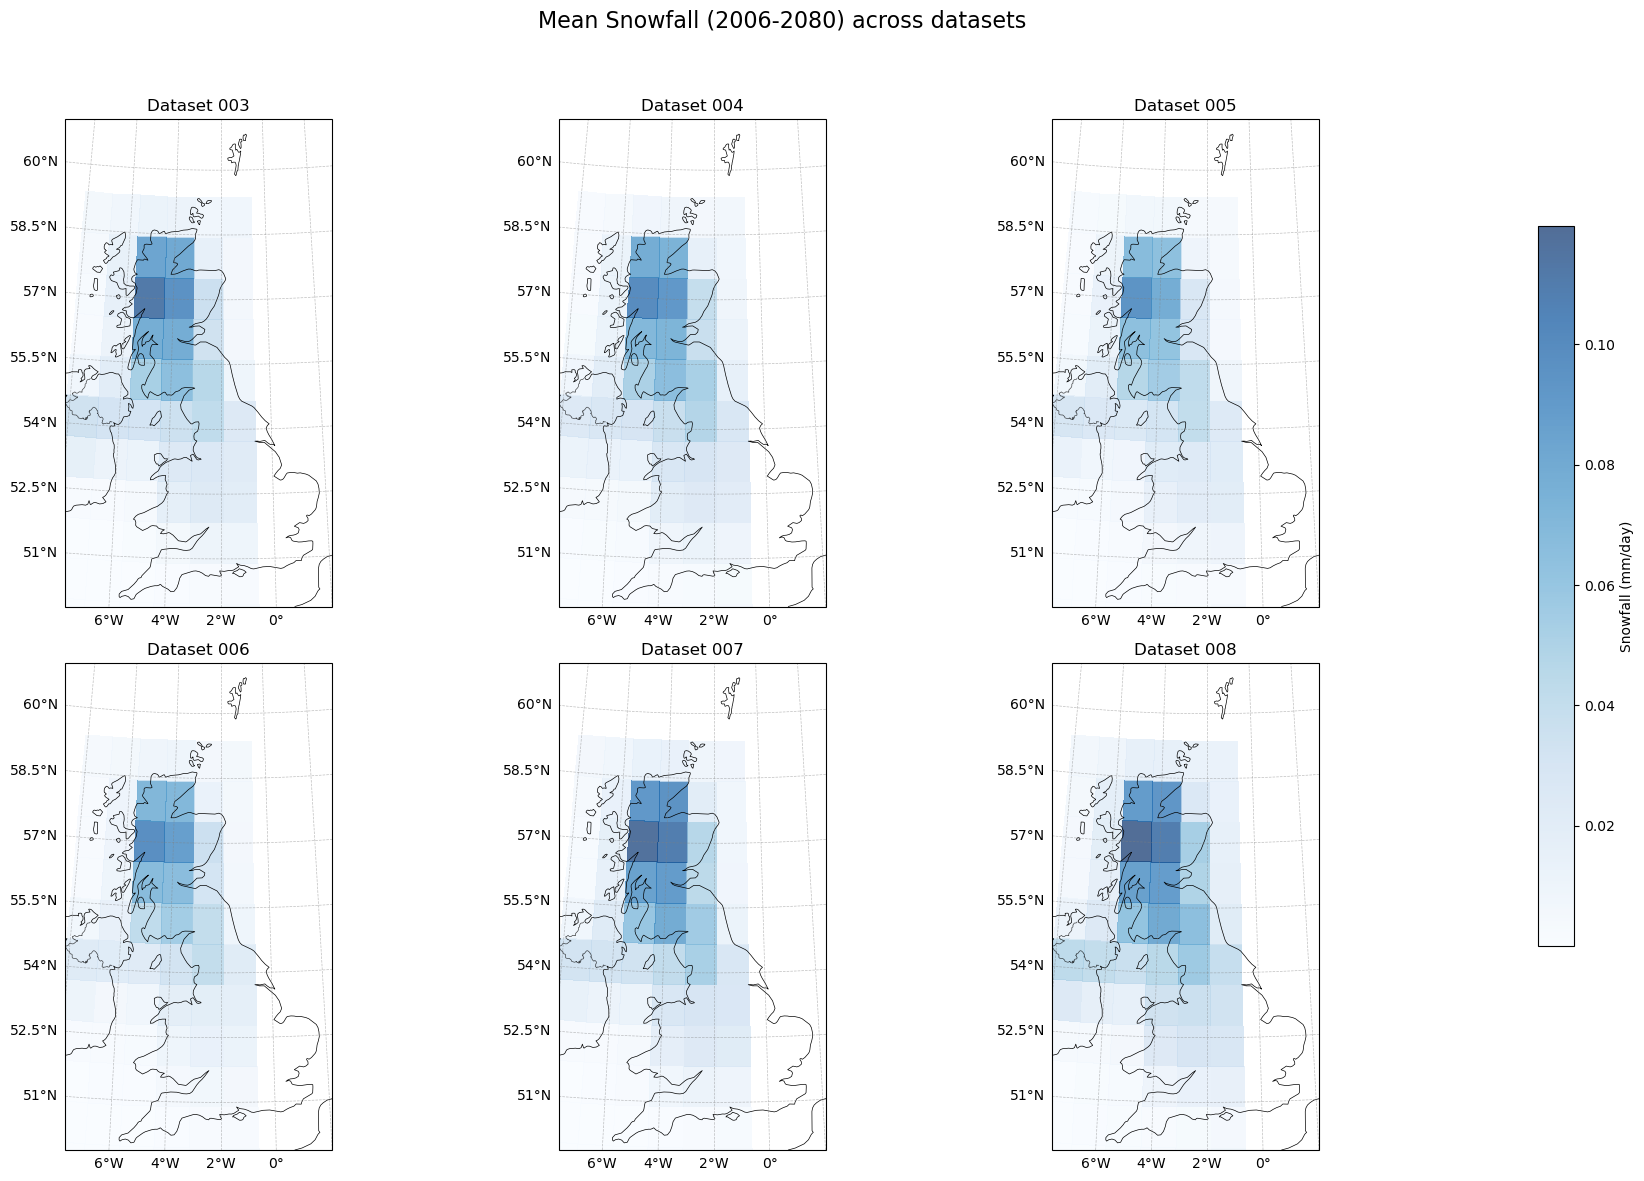

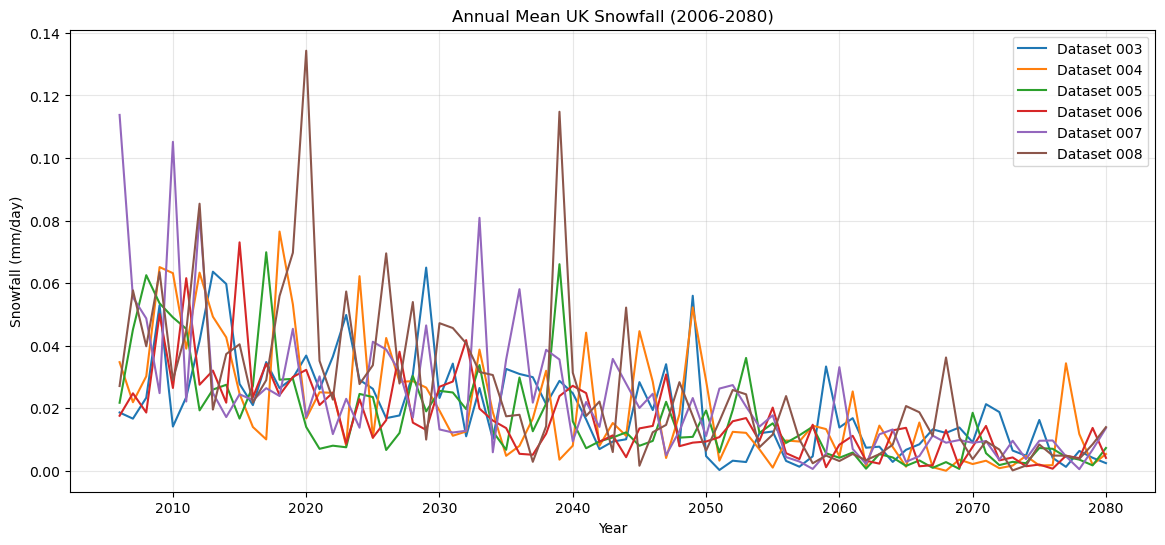

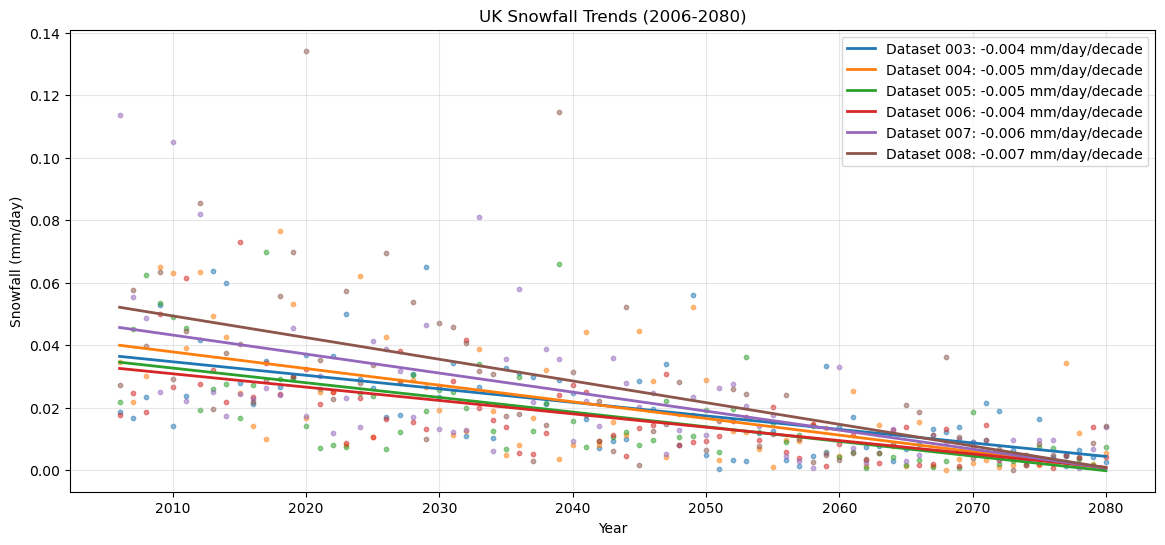

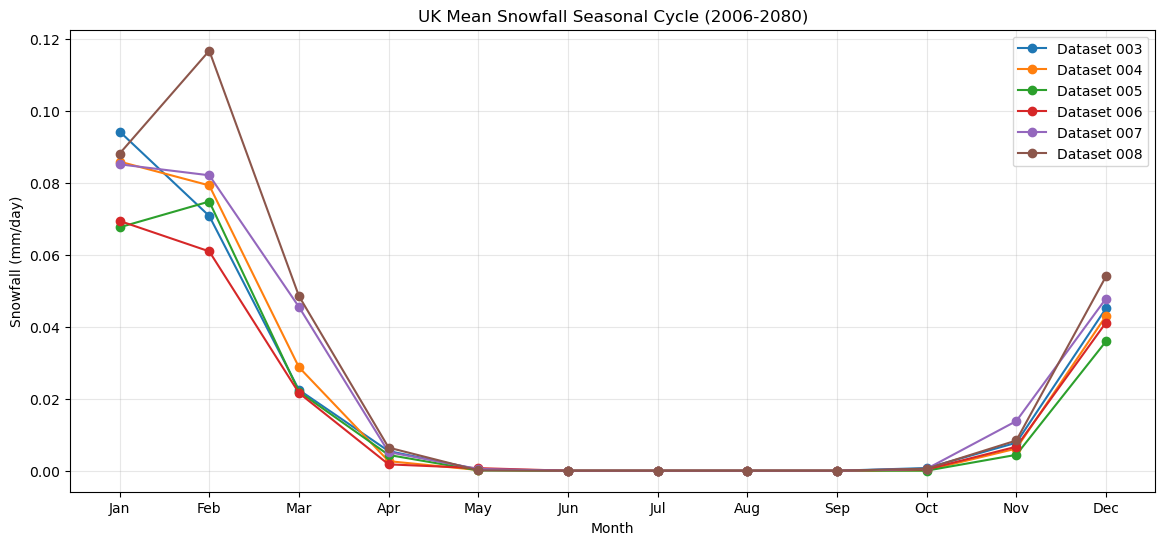

In [14]:
# Import helper function
sys.path.append('.')
from helper import load_datasets

# Define file paths and load datasets
file_paths = [f"../data/00{i}_2006_2080_352_360.nc" for i in range(3, 9)]
datasets = load_datasets(file_paths)

# Convert longitude from 0-360 to -180 to 180 format
def convert_longitude(lon):
    return np.where(lon > 180, lon - 360, lon)

# Note: PRSN is typically in m/s in CESM, so convert to mm/day for easier interpretation
conversion_factor = 86400 * 1000  # seconds in a day * 1000 to convert m to mm

# 1. Create spatial maps of snowfall across the UK
fig = plt.figure(figsize=(18, 12))

# Calculate min/max for consistent coloring
all_means = [ds.PRSN.mean(dim='time') * conversion_factor for ds in datasets]
vmin = min(mean.min() for mean in all_means)
vmax = max(mean.max() for mean in all_means)

for i, ds in enumerate(datasets):
    # Calculate mean snowfall
    snow_mean = ds.PRSN.mean(dim='time') * conversion_factor
    lon_values = convert_longitude(snow_mean.lon.values)
    
    # Create subplot with British National Grid projection
    ax = fig.add_subplot(2, 3, i+1, projection=ccrs.OSGB())
    
    # Add map features
    ax.coastlines(resolution='50m', linewidth=0.5)
    ax.add_feature(cf.BORDERS, linewidth=0.5, alpha=0.7)
    
    # Set extent to UK
    ax.set_extent([-9, 2, 49, 61], crs=ccrs.PlateCarree())
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    
    # Plot snowfall data
    mesh = ax.pcolormesh(lon_values, snow_mean.lat.values, snow_mean, 
                       transform=ccrs.PlateCarree(),
                       cmap='Blues', alpha=0.7,
                       vmin=vmin, vmax=vmax)
    
    ax.set_title(f'Dataset {i+3:03d}')

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(mesh, cax=cbar_ax)
cbar.set_label('Snowfall (mm/day)')

plt.suptitle('Mean Snowfall (2006-2080) across datasets', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# 2. Time series of annual snowfall
plt.figure(figsize=(14, 6))

for i, ds in enumerate(datasets):
    # Calculate UK average snowfall
    uk_mean = ds.PRSN.mean(dim=['lat', 'lon']) * conversion_factor
    
    # Group by year
    annual_snow = uk_mean.groupby('time.year').mean()
    
    # Plot annual snowfall
    plt.plot(annual_snow.year, annual_snow, label=f'Dataset {i+3:03d}')

plt.title('Annual Mean UK Snowfall (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Snowfall (mm/day)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 3. Snowfall trends
plt.figure(figsize=(14, 6))

# Prepare for storing trend values
trends = []

for i, ds in enumerate(datasets):
    # Calculate UK mean snowfall
    uk_mean = ds.PRSN.mean(dim=['lat', 'lon']) * conversion_factor
    
    # Group by year
    annual_snow = uk_mean.groupby('time.year').mean()
    
    # Calculate linear trend
    x = annual_snow.year.values
    y = annual_snow.values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    
    # Store trend (mm/day per decade)
    trend_per_decade = z[0] * 10
    trends.append(trend_per_decade)
    
    # Plot data and trend line
    plt.scatter(x, y, alpha=0.5, s=10)
    plt.plot(x, p(x), linewidth=2, label=f'Dataset {i+3:03d}: {trend_per_decade:.3f} mm/day/decade')

plt.title('UK Snowfall Trends (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Snowfall (mm/day)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 4. Seasonal cycle of snowfall
plt.figure(figsize=(14, 6))

for i, ds in enumerate(datasets):
    # Calculate UK mean snowfall
    uk_mean = ds.PRSN.mean(dim=['lat', 'lon']) * conversion_factor
    
    # Group by month
    monthly_snow = uk_mean.groupby('time.month').mean()
    
    # Plot seasonal cycle
    plt.plot(monthly_snow.month, monthly_snow, 'o-', label=f'Dataset {i+3:03d}')

plt.title('UK Mean Snowfall Seasonal Cycle (2006-2080)')
plt.xlabel('Month')
plt.ylabel('Snowfall (mm/day)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Loaded 6 datasets


C:\Users\rebec\AppData\Local\Temp\ipykernel_49612\2469086851.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


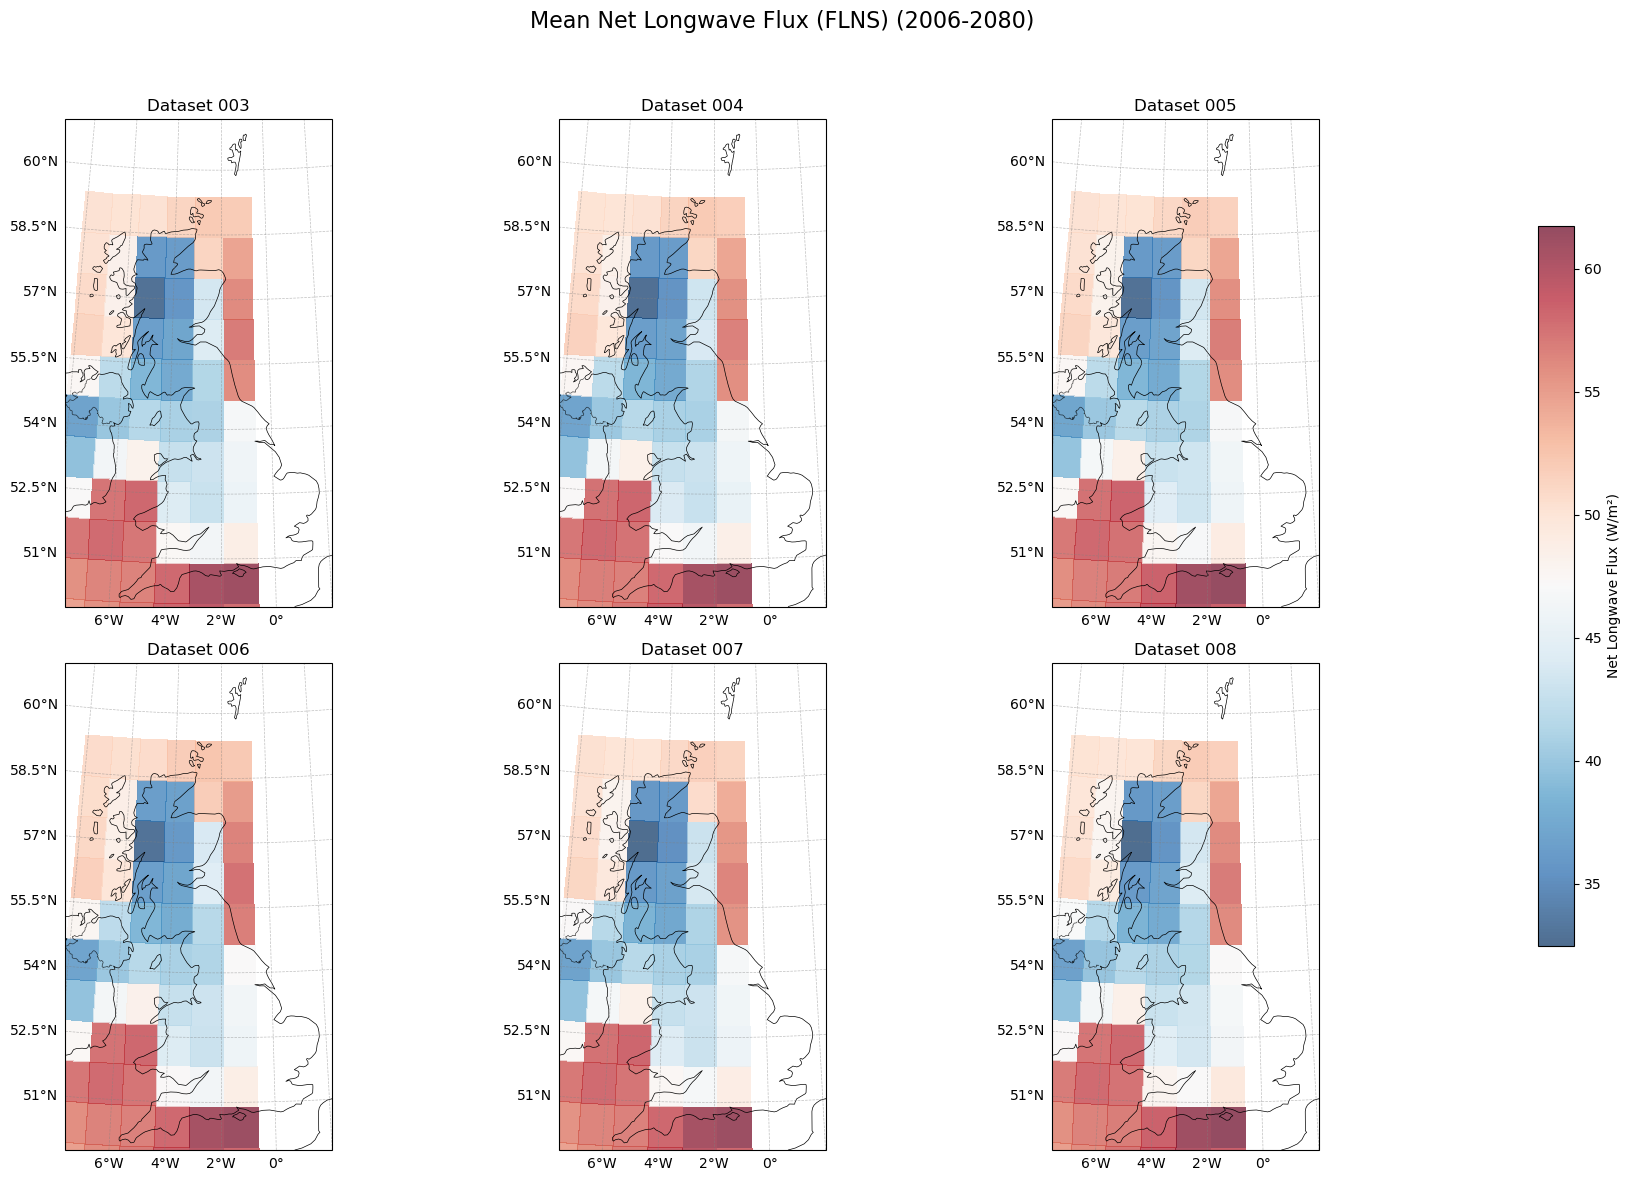

C:\Users\rebec\AppData\Local\Temp\ipykernel_49612\2469086851.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


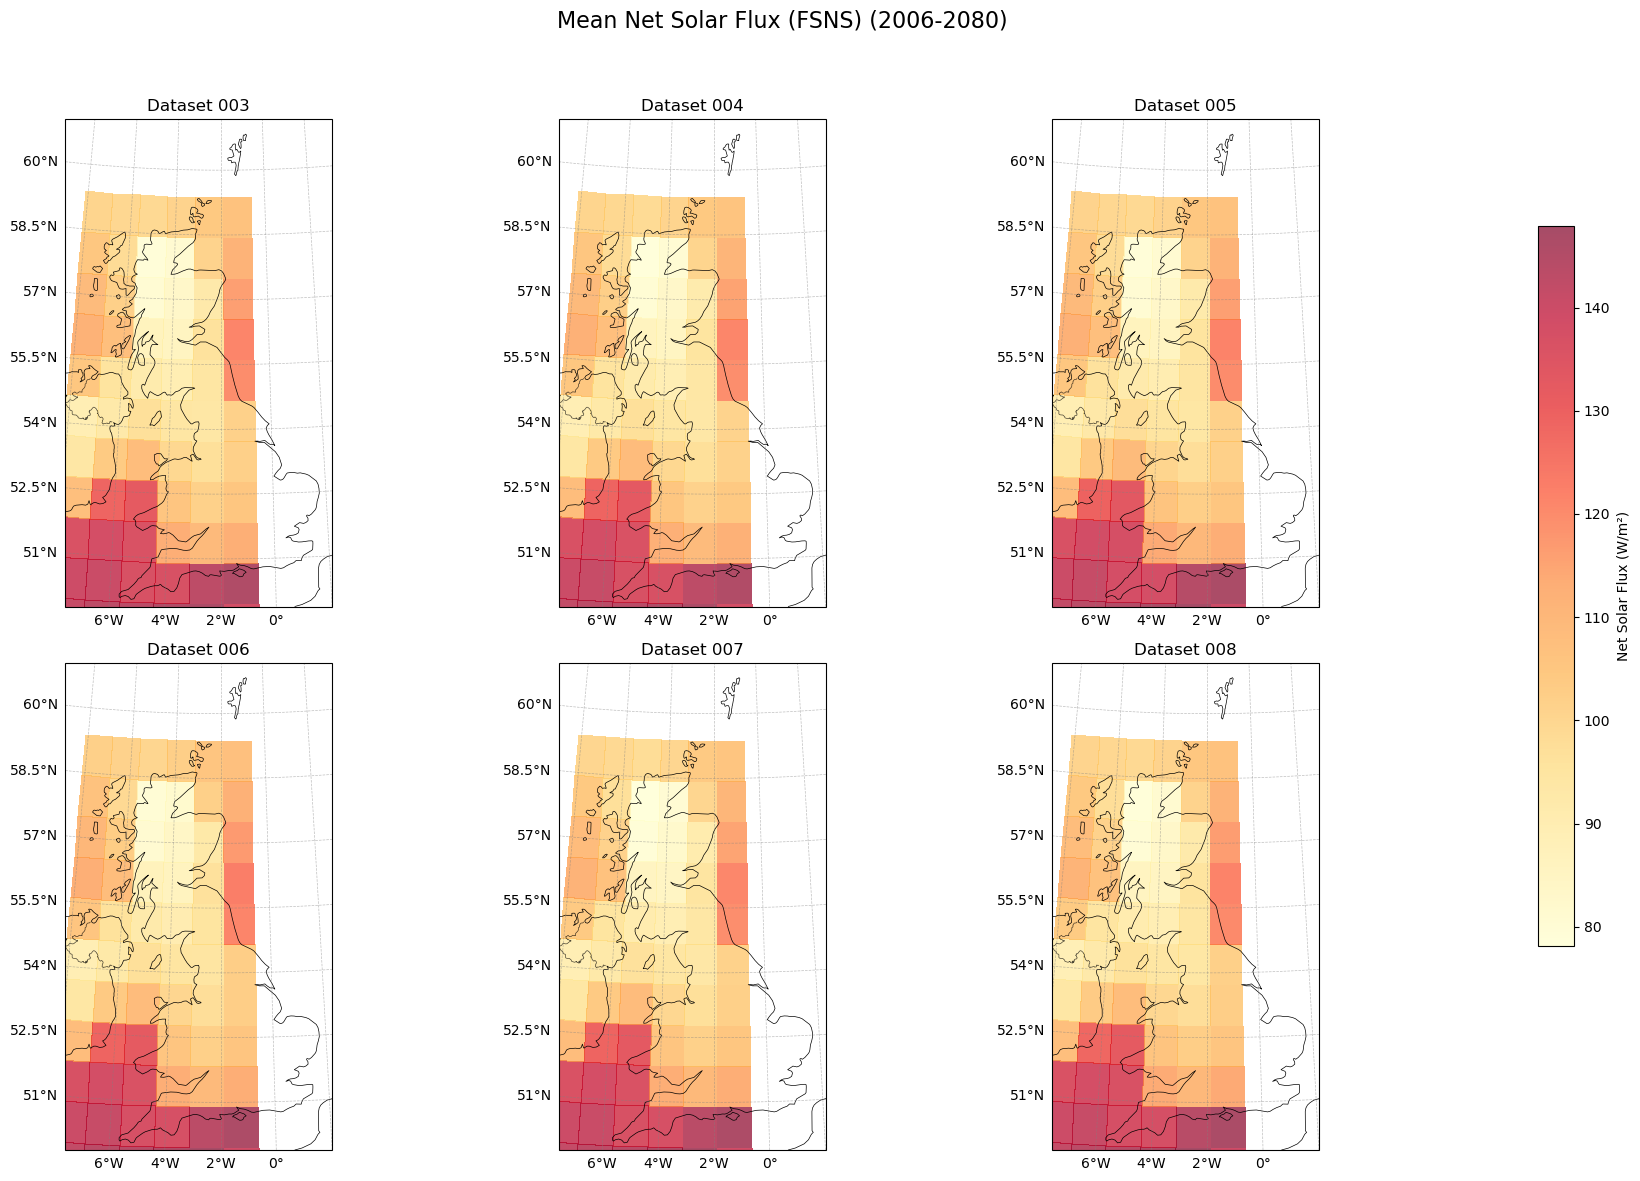

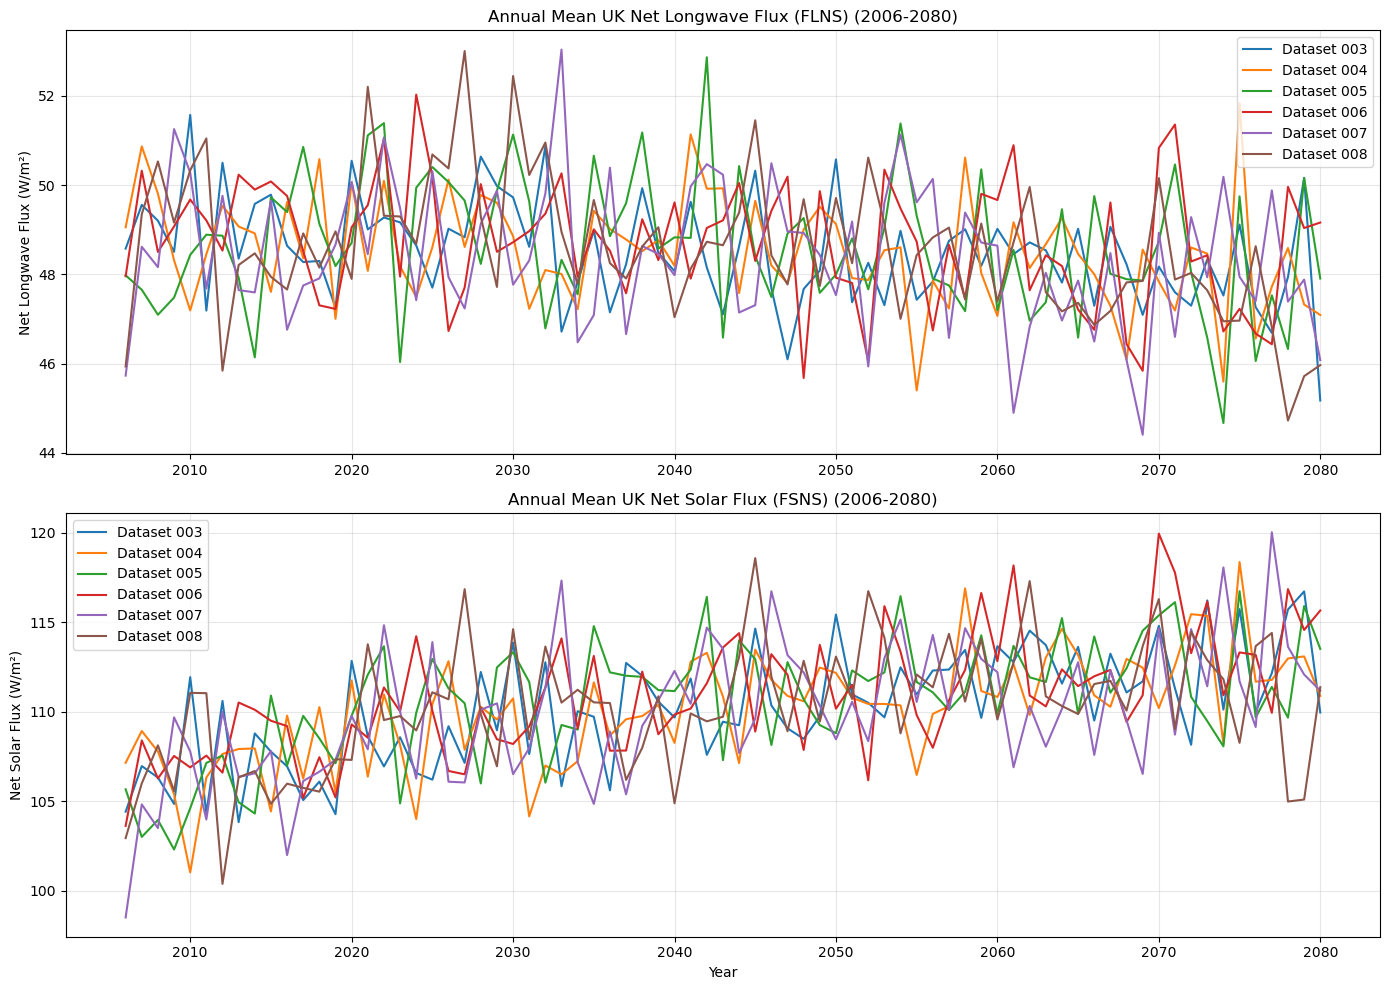

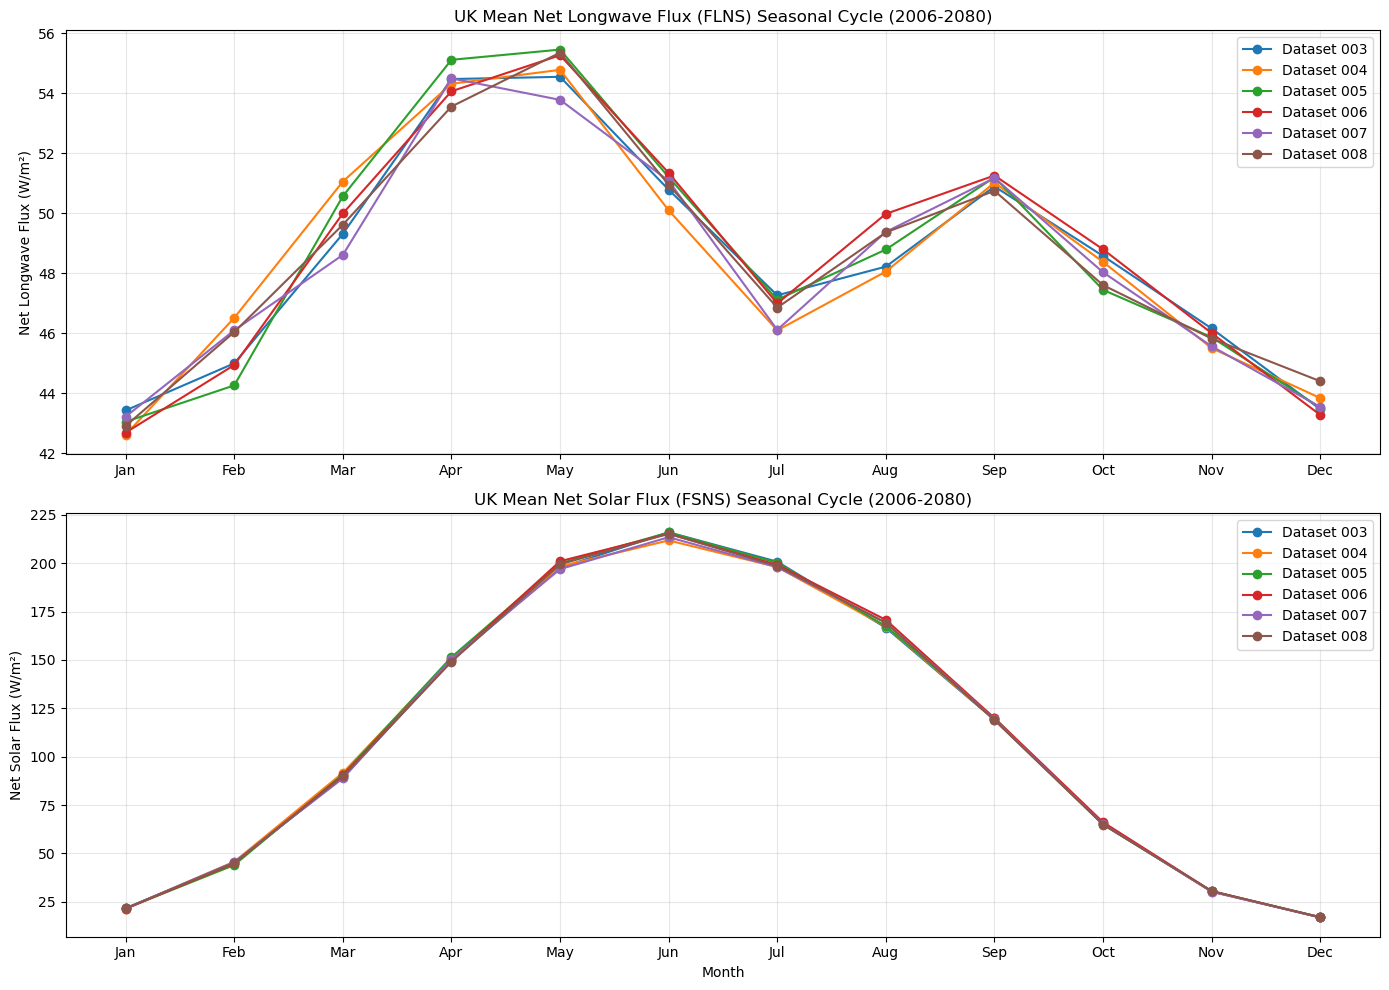

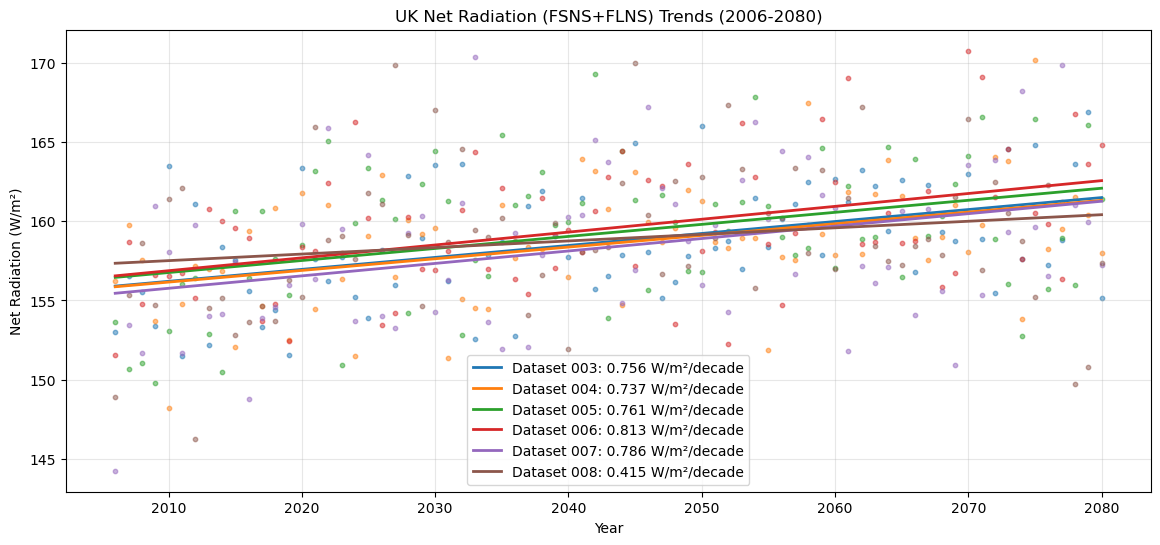

In [11]:
# Import helper function
sys.path.append('.')
from helper import load_datasets

# Define file paths and load datasets
file_paths = [f"../data/00{i}_2006_2080_352_360.nc" for i in range(3, 9)]
datasets = load_datasets(file_paths)
print(f"Loaded {len(datasets)} datasets")

# Convert longitude from 0-360 to -180 to 180 format
def convert_longitude(lon):
    return np.where(lon > 180, lon - 360, lon)

# 1. Create spatial maps of net longwave flux (FLNS)
fig = plt.figure(figsize=(18, 12))

# Calculate min/max for consistent coloring
all_means = [ds.FLNS.mean(dim='time') for ds in datasets]
vmin = min(mean.min() for mean in all_means)
vmax = max(mean.max() for mean in all_means)

for i, ds in enumerate(datasets):
    # Calculate mean longwave flux
    flns_mean = ds.FLNS.mean(dim='time')
    lon_values = convert_longitude(flns_mean.lon.values)
    
    # Create subplot with British National Grid projection
    ax = fig.add_subplot(2, 3, i+1, projection=ccrs.OSGB())
    
    # Add map features
    ax.coastlines(resolution='50m', linewidth=0.5)
    ax.add_feature(cf.BORDERS, linewidth=0.5, alpha=0.7)
    
    # Set extent to UK
    ax.set_extent([-9, 2, 49, 61], crs=ccrs.PlateCarree())
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    
    # Plot longwave flux data
    mesh = ax.pcolormesh(lon_values, flns_mean.lat.values, flns_mean, 
                      transform=ccrs.PlateCarree(),
                      cmap='RdBu_r', alpha=0.7,
                      vmin=vmin, vmax=vmax)
    
    ax.set_title(f'Dataset {i+3:03d}')

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(mesh, cax=cbar_ax)
cbar.set_label('Net Longwave Flux (W/m²)')

plt.suptitle('Mean Net Longwave Flux (FLNS) (2006-2080)', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# 2. Create spatial maps of net solar flux (FSNS)
fig = plt.figure(figsize=(18, 12))

# Calculate min/max for consistent coloring
all_means = [ds.FSNS.mean(dim='time') for ds in datasets]
vmin = min(mean.min() for mean in all_means)
vmax = max(mean.max() for mean in all_means)

for i, ds in enumerate(datasets):
    # Calculate mean solar flux
    fsns_mean = ds.FSNS.mean(dim='time')
    lon_values = convert_longitude(fsns_mean.lon.values)
    
    # Create subplot with British National Grid projection
    ax = fig.add_subplot(2, 3, i+1, projection=ccrs.OSGB())
    
    # Add map features
    ax.coastlines(resolution='50m', linewidth=0.5)
    ax.add_feature(cf.BORDERS, linewidth=0.5, alpha=0.7)
    
    # Set extent to UK
    ax.set_extent([-9, 2, 49, 61], crs=ccrs.PlateCarree())
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    
    # Plot solar flux data
    mesh = ax.pcolormesh(lon_values, fsns_mean.lat.values, fsns_mean, 
                      transform=ccrs.PlateCarree(),
                      cmap='YlOrRd', alpha=0.7,
                      vmin=vmin, vmax=vmax)
    
    ax.set_title(f'Dataset {i+3:03d}')

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(mesh, cax=cbar_ax)
cbar.set_label('Net Solar Flux (W/m²)')

plt.suptitle('Mean Net Solar Flux (FSNS) (2006-2080)', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# 3. Time series of annual UK mean FLNS and FSNS
plt.figure(figsize=(14, 10))

# Create two subplots
plt.subplot(2, 1, 1)
for i, ds in enumerate(datasets):
    # Calculate UK average FLNS
    uk_mean = ds.FLNS.mean(dim=['lat', 'lon'])
    
    # Group by year
    annual_means = uk_mean.groupby('time.year').mean()
    
    # Plot annual FLNS
    plt.plot(annual_means.year, annual_means, label=f'Dataset {i+3:03d}')

plt.title('Annual Mean UK Net Longwave Flux (FLNS) (2006-2080)')
plt.ylabel('Net Longwave Flux (W/m²)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 1, 2)
for i, ds in enumerate(datasets):
    # Calculate UK average FSNS
    uk_mean = ds.FSNS.mean(dim=['lat', 'lon'])
    
    # Group by year
    annual_means = uk_mean.groupby('time.year').mean()
    
    # Plot annual FSNS
    plt.plot(annual_means.year, annual_means, label=f'Dataset {i+3:03d}')

plt.title('Annual Mean UK Net Solar Flux (FSNS) (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Net Solar Flux (W/m²)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# 4. Seasonal cycles of FLNS and FSNS
plt.figure(figsize=(14, 10))

# Create two subplots
plt.subplot(2, 1, 1)
for i, ds in enumerate(datasets):
    # Calculate UK average FLNS
    uk_mean = ds.FLNS.mean(dim=['lat', 'lon'])
    
    # Group by month
    monthly_means = uk_mean.groupby('time.month').mean()
    
    # Plot seasonal cycle
    plt.plot(monthly_means.month, monthly_means, 'o-', label=f'Dataset {i+3:03d}')

plt.title('UK Mean Net Longwave Flux (FLNS) Seasonal Cycle (2006-2080)')
plt.ylabel('Net Longwave Flux (W/m²)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 1, 2)
for i, ds in enumerate(datasets):
    # Calculate UK average FSNS
    uk_mean = ds.FSNS.mean(dim=['lat', 'lon'])
    
    # Group by month
    monthly_means = uk_mean.groupby('time.month').mean()
    
    # Plot seasonal cycle
    plt.plot(monthly_means.month, monthly_means, 'o-', label=f'Dataset {i+3:03d}')

plt.title('UK Mean Net Solar Flux (FSNS) Seasonal Cycle (2006-2080)')
plt.xlabel('Month')
plt.ylabel('Net Solar Flux (W/m²)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# 5. Calculate net radiation trends (FSNS + FLNS)
plt.figure(figsize=(14, 6))

# Prepare for storing trend values
trends = []

for i, ds in enumerate(datasets):
    # Calculate UK mean net radiation (FSNS + FLNS)
    net_rad = (ds.FSNS + ds.FLNS).mean(dim=['lat', 'lon'])
    
    # Group by year
    annual_means = net_rad.groupby('time.year').mean()
    
    # Calculate linear trend
    x = annual_means.year.values
    y = annual_means.values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    
    # Store trend (W/m² per decade)
    trend_per_decade = z[0] * 10
    trends.append(trend_per_decade)
    
    # Plot data and trend line
    plt.scatter(x, y, alpha=0.5, s=10)
    plt.plot(x, p(x), linewidth=2, label=f'Dataset {i+3:03d}: {trend_per_decade:.3f} W/m²/decade')

plt.title('UK Net Radiation (FSNS+FLNS) Trends (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Net Radiation (W/m²)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\rebec\AppData\Local\Temp\ipykernel_49612\1551673547.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


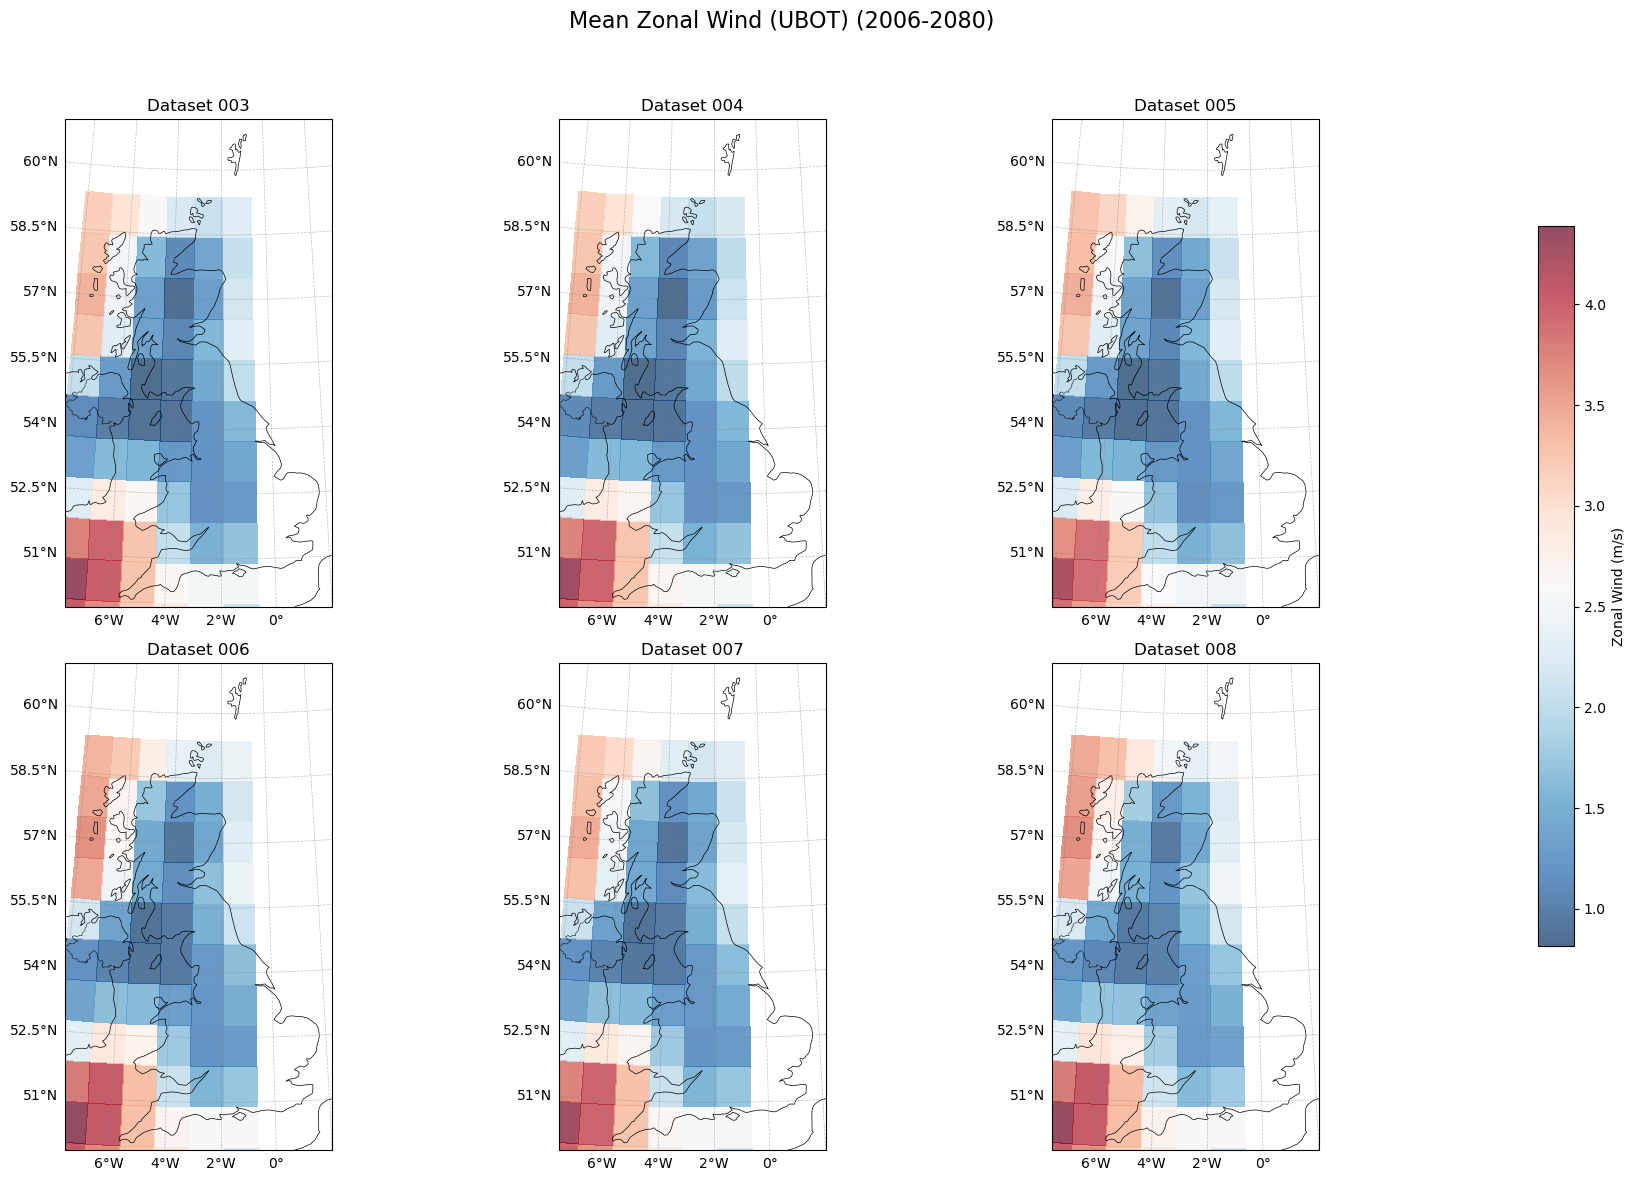

C:\Users\rebec\AppData\Local\Temp\ipykernel_49612\1551673547.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


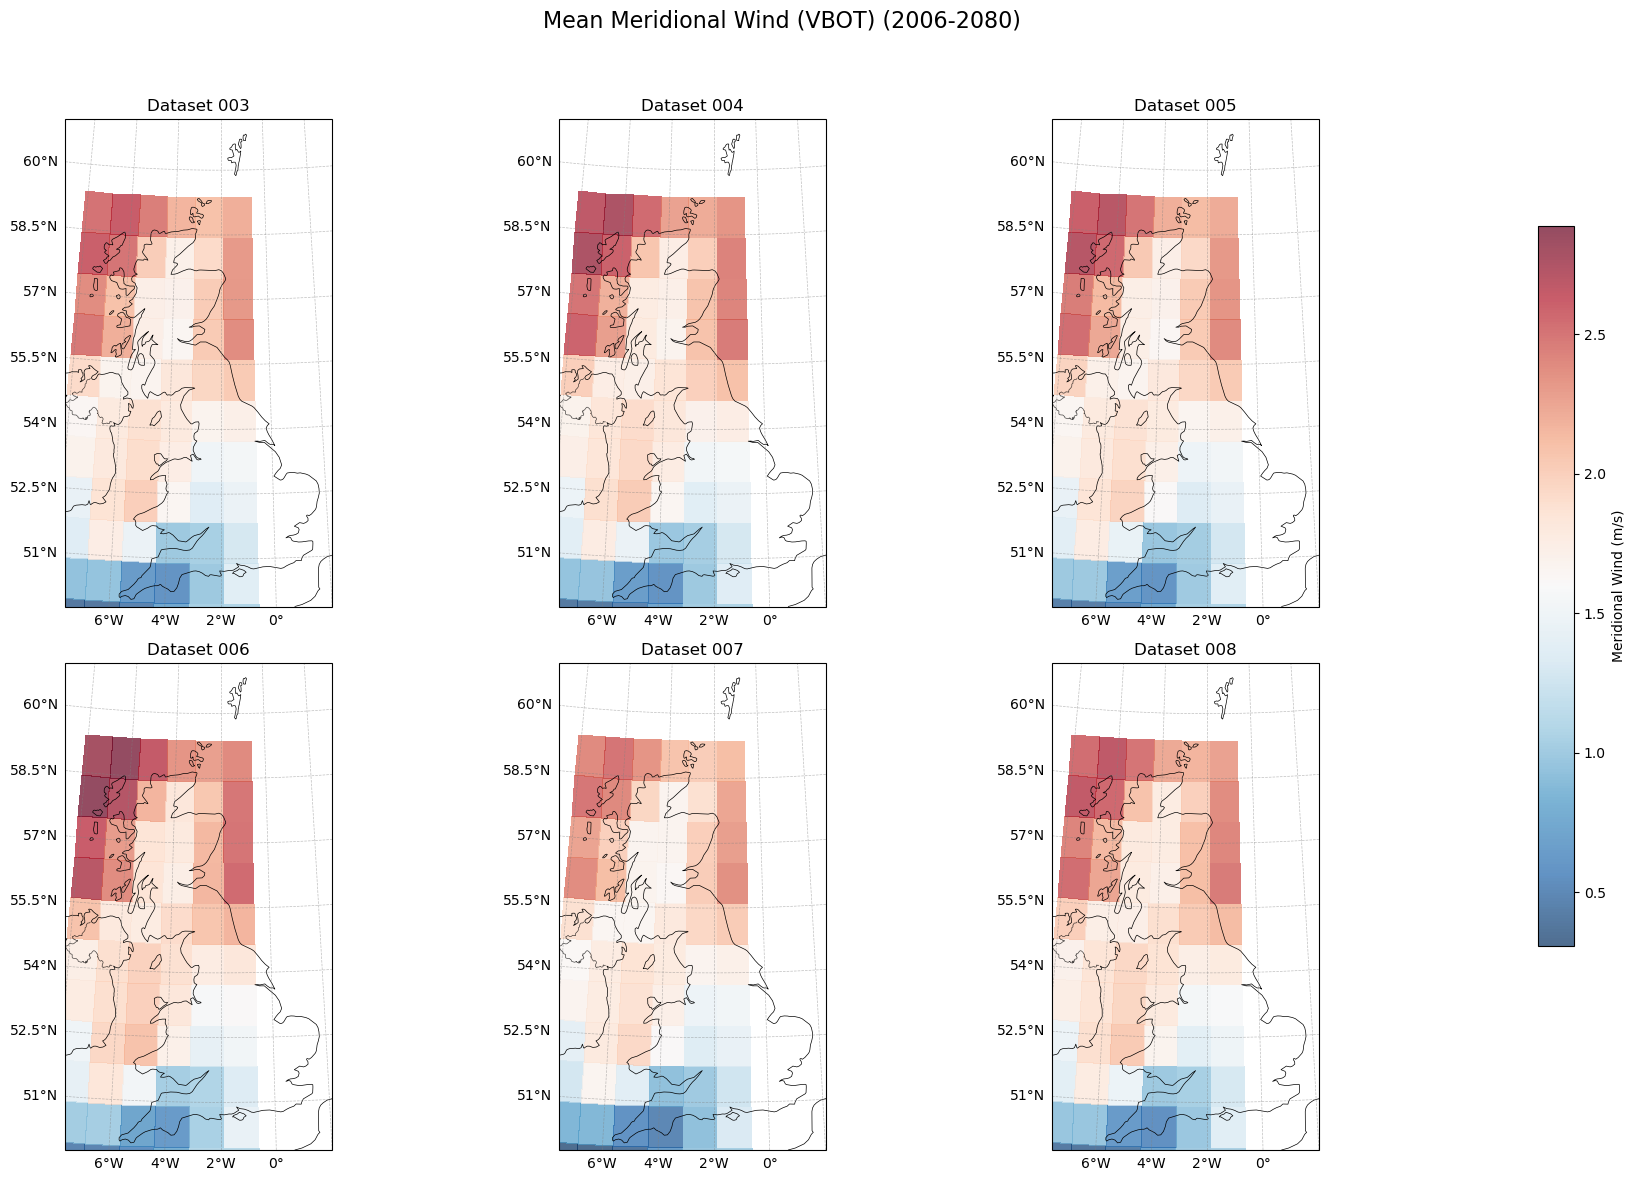

C:\Users\rebec\AppData\Local\Temp\ipykernel_49612\1551673547.py:157: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


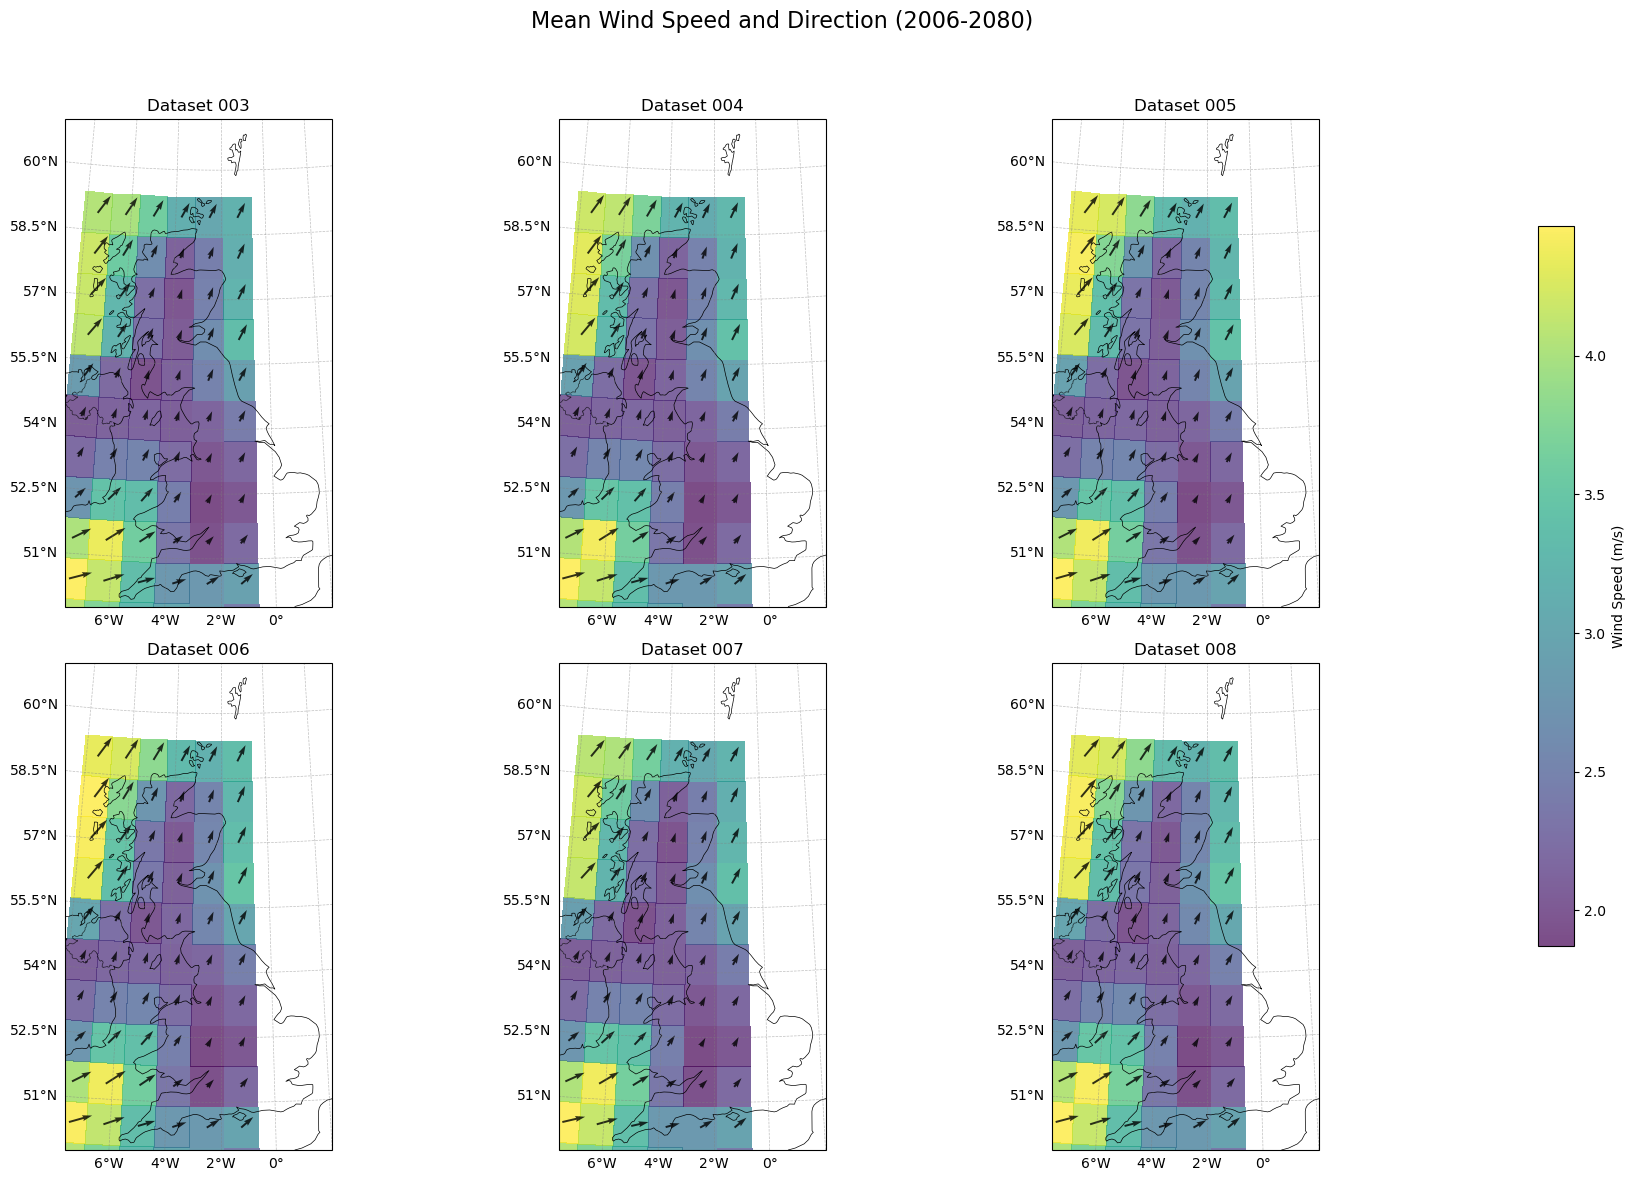

In [12]:
# Import helper function
sys.path.append('.')
from helper import load_datasets

# Define file paths and load datasets
file_paths = [f"../data/00{i}_2006_2080_352_360.nc" for i in range(3, 9)]
datasets = load_datasets(file_paths)

# Convert longitude from 0-360 to -180 to 180 format
def convert_longitude(lon):
    return np.where(lon > 180, lon - 360, lon)

# 1. Create spatial maps of mean zonal wind (UBOT)
fig = plt.figure(figsize=(18, 12))

# Calculate min/max for consistent coloring
all_means = [ds.UBOT.mean(dim='time') for ds in datasets]
vmin = min(mean.min() for mean in all_means)
vmax = max(mean.max() for mean in all_means)

for i, ds in enumerate(datasets):
    # Calculate mean zonal wind
    ubot_mean = ds.UBOT.mean(dim='time')
    lon_values = convert_longitude(ubot_mean.lon.values)
    
    # Create subplot with British National Grid projection
    ax = fig.add_subplot(2, 3, i+1, projection=ccrs.OSGB())
    
    # Add map features
    ax.coastlines(resolution='50m', linewidth=0.5)
    ax.add_feature(cf.BORDERS, linewidth=0.5, alpha=0.7)
    
    # Set extent to UK
    ax.set_extent([-9, 2, 49, 61], crs=ccrs.PlateCarree())
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    
    # Plot zonal wind data with a diverging colormap
    mesh = ax.pcolormesh(lon_values, ubot_mean.lat.values, ubot_mean, 
                      transform=ccrs.PlateCarree(),
                      cmap='RdBu_r', alpha=0.7,
                      vmin=vmin, vmax=vmax)
    
    ax.set_title(f'Dataset {i+3:03d}')

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(mesh, cax=cbar_ax)
cbar.set_label('Zonal Wind (m/s)')

plt.suptitle('Mean Zonal Wind (UBOT) (2006-2080)', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# 2. Create spatial maps of mean meridional wind (VBOT)
fig = plt.figure(figsize=(18, 12))

# Calculate min/max for consistent coloring
all_means = [ds.VBOT.mean(dim='time') for ds in datasets]
vmin = min(mean.min() for mean in all_means)
vmax = max(mean.max() for mean in all_means)

for i, ds in enumerate(datasets):
    # Calculate mean meridional wind
    vbot_mean = ds.VBOT.mean(dim='time')
    lon_values = convert_longitude(vbot_mean.lon.values)
    
    # Create subplot with British National Grid projection
    ax = fig.add_subplot(2, 3, i+1, projection=ccrs.OSGB())
    
    # Add map features
    ax.coastlines(resolution='50m', linewidth=0.5)
    ax.add_feature(cf.BORDERS, linewidth=0.5, alpha=0.7)
    
    # Set extent to UK
    ax.set_extent([-9, 2, 49, 61], crs=ccrs.PlateCarree())
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    
    # Plot meridional wind data with a diverging colormap
    mesh = ax.pcolormesh(lon_values, vbot_mean.lat.values, vbot_mean, 
                      transform=ccrs.PlateCarree(),
                      cmap='RdBu_r', alpha=0.7,
                      vmin=vmin, vmax=vmax)
    
    ax.set_title(f'Dataset {i+3:03d}')

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(mesh, cax=cbar_ax)
cbar.set_label('Meridional Wind (m/s)')

plt.suptitle('Mean Meridional Wind (VBOT) (2006-2080)', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# 3. Calculate and plot wind speed and direction
fig = plt.figure(figsize=(18, 12))

for i, ds in enumerate(datasets):
    # Calculate mean wind components
    ubot_mean = ds.UBOT.mean(dim='time')
    vbot_mean = ds.VBOT.mean(dim='time')
    
    # Calculate wind speed (maintaining xarray dimensions)
    wind_speed = np.sqrt(ubot_mean**2 + vbot_mean**2)
    
    # Convert longitudes
    lon_values = convert_longitude(ubot_mean.lon.values)
    
    # Create subplot with British National Grid projection
    ax = fig.add_subplot(2, 3, i+1, projection=ccrs.OSGB())
    
    # Add map features
    ax.coastlines(resolution='50m', linewidth=0.5)
    ax.add_feature(cf.BORDERS, linewidth=0.5, alpha=0.7)
    
    # Set extent to UK
    ax.set_extent([-9, 2, 49, 61], crs=ccrs.PlateCarree())
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    
    # Use pcolormesh instead of contourf to avoid dimension issues
    mesh = ax.pcolormesh(lon_values, ubot_mean.lat.values, wind_speed, 
                        transform=ccrs.PlateCarree(),
                        cmap='viridis', alpha=0.7)
    
    # Plot wind vectors (arrows)
    # Use every other point to avoid crowding
    skip = 1
    quiver_x = lon_values[::skip]
    quiver_y = ubot_mean.lat.values[::skip]
    quiver_u = ubot_mean.values[::skip, ::skip]
    quiver_v = vbot_mean.values[::skip, ::skip]
    
    ax.quiver(quiver_x, quiver_y, quiver_u, quiver_v,
             transform=ccrs.PlateCarree(),
             scale=50, alpha=0.8)
    
    ax.set_title(f'Dataset {i+3:03d}')

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(mesh, cax=cbar_ax)
cbar.set_label('Wind Speed (m/s)')

plt.suptitle('Mean Wind Speed and Direction (2006-2080)', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()
